### Importando os modulos que serão utilizados para facilitar a análise dos dados

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib as mpl

from pathlib import Path
from re import compile as cp
from calendar import month_abbr
from os import mkdir, path


### Cria a pasta Médias e a pasta Figuras para poderem ser salvos os resultados obtidos

In [15]:
if not path.exists('dados/tidi/medias'):
    mkdir('dados/tidi/medias')
    mkdir('dados/tidi/figuras')

### Cria uma lista de todos os arquivos dentro da pasta passada dentro do Path('.')(Para mudar de pasta, só mudar o '.', pelo nome da pasta. Ex: Path('casa'))

In [16]:
dir_ventos = ['zonal', 'meridional']
caminhos = [ Path('dados/tidi/dados_'+path+'/') for path in dir_ventos]
arquivos = sorted([i for caminho in caminhos for i in caminho.glob('*.txt')])


In [17]:
arquivos

[WindowsPath('dados/tidi/dados_meridional/dados_meridional_200501_001.txt'),
 WindowsPath('dados/tidi/dados_meridional/dados_meridional_200501_002.txt'),
 WindowsPath('dados/tidi/dados_meridional/dados_meridional_200501_003.txt'),
 WindowsPath('dados/tidi/dados_meridional/dados_meridional_200501_004.txt'),
 WindowsPath('dados/tidi/dados_meridional/dados_meridional_200501_005.txt'),
 WindowsPath('dados/tidi/dados_meridional/dados_meridional_200501_006.txt'),
 WindowsPath('dados/tidi/dados_meridional/dados_meridional_200501_007.txt'),
 WindowsPath('dados/tidi/dados_meridional/dados_meridional_200501_008.txt'),
 WindowsPath('dados/tidi/dados_meridional/dados_meridional_200501_009.txt'),
 WindowsPath('dados/tidi/dados_meridional/dados_meridional_200501_010.txt'),
 WindowsPath('dados/tidi/dados_meridional/dados_meridional_200501_011.txt'),
 WindowsPath('dados/tidi/dados_meridional/dados_meridional_200501_012.txt'),
 WindowsPath('dados/tidi/dados_meridional/dados_meridional_200501_013.txt'),

### Procura pelo ano e mês dentro do nome do arquivo. Util para saber qual mês está sendo trabalhado e de qual ano

In [18]:
compilado = cp('[a-z]|[A-Z]')
ano = cp('\d\d\d\d')

# Ler os dados, calcula a média e salva na pasta médias

In [19]:
dict_months = {
    '01': [1, 31],
    '02': [32, 59],
    '03': [60, 90],
    '04': [91, 120],
    '05': [121, 151],
    '06': [152, 181],
    '07': [182, 212],
    '08': [213, 243],
    '09': [244, 273],
    '10': [274, 304],
    '11': [305, 334],
    '12': [335, 365],
}

dict_day_to_month = { i:k  for k,v in zip(dict_months.keys(), dict_months.values()) for i in range(v[0], v[1]+1)}

In [20]:
dict_day_to_month[2]

'01'

In [36]:
ucolunas = ['tempo_decorrido', '80.0km', '82.5km', '85.0km', '87.5km', '90.0km', '92.5km', '95.0km', '97.5km', '100.0km']

cabe = ['tempo', '80', '82.5', '85', '87.5', '90', '92.5', '95', '97.5', '100']

mes_atual = '01'
df_mes_media = []
df_medias = []
nome_arquivo_inicial = str(arquivos[0])

for i in arquivos:
    print(i)
    df = pd.read_csv(i, sep=';', usecols=ucolunas)
    df.columns = cabe
    nome_arquivo = str(i)
    dia = nome_arquivo[-7:-4]
    prox_mes = dict_day_to_month[int(dia)]
    
    if prox_mes == mes_atual:
        medias = df.mean()
        df_res = pd.DataFrame(medias).T
        df_res['dia'] = dia
        df_mes_media.append(df_res)
    else:
        df_medias = pd.concat(df_mes_media)

        if 'meridional' in nome_arquivo_inicial:
            nome_arquivo_final = nome_arquivo_inicial[28:51]
        else:
            nome_arquivo_final = nome_arquivo_inicial[23:41]

        df_medias.to_string(f'dados/tidi/medias/'+nome_arquivo_final+'.txt', index=False)

        mes_atual = dict_day_to_month[int(dia)]
        df_mes_media = []
        nome_arquivo_inicial = nome_arquivo

df_medias = pd.concat(df_mes_media)

if 'meridional' in nome_arquivo_inicial:
    nome_arquivo_final = nome_arquivo_inicial[28:51]
else:
    nome_arquivo_final = nome_arquivo_inicial[23:41]

df_medias.to_string(f'dados/tidi/medias/'+nome_arquivo_final+'.txt', index=False)

dados\tidi\dados_meridional\dados_meridional_200501_001.txt
dados\tidi\dados_meridional\dados_meridional_200501_002.txt
dados\tidi\dados_meridional\dados_meridional_200501_003.txt
dados\tidi\dados_meridional\dados_meridional_200501_004.txt
dados\tidi\dados_meridional\dados_meridional_200501_005.txt
dados\tidi\dados_meridional\dados_meridional_200501_006.txt
dados\tidi\dados_meridional\dados_meridional_200501_007.txt
dados\tidi\dados_meridional\dados_meridional_200501_008.txt
dados\tidi\dados_meridional\dados_meridional_200501_009.txt
dados\tidi\dados_meridional\dados_meridional_200501_010.txt
dados\tidi\dados_meridional\dados_meridional_200501_011.txt
dados\tidi\dados_meridional\dados_meridional_200501_012.txt
dados\tidi\dados_meridional\dados_meridional_200501_013.txt
dados\tidi\dados_meridional\dados_meridional_200501_014.txt
dados\tidi\dados_meridional\dados_meridional_200501_015.txt
dados\tidi\dados_meridional\dados_meridional_200501_016.txt
dados\tidi\dados_meridional\dados_meridi

## Defini o estilo para a plotagem dos gráficos

In [37]:
mpl.style.use('ggplot')
# mpl.rcParams['font.family'] = ['Family1', 'Serif', 'cursive']
mpl.rcParams['font.size'] = 21
mpl.rcParams['figure.max_open_warning'] = 50

## Cria uma lista com todos os dados salvos dentro da pasta médias

In [38]:
caminho_medias = 'dados/tidi/medias'
c_medias = Path(caminho_medias)
arquivos3 = sorted([i for i in c_medias.glob('*.txt')])

## Plota os dados e salva as figuras dentro da pasta figuras

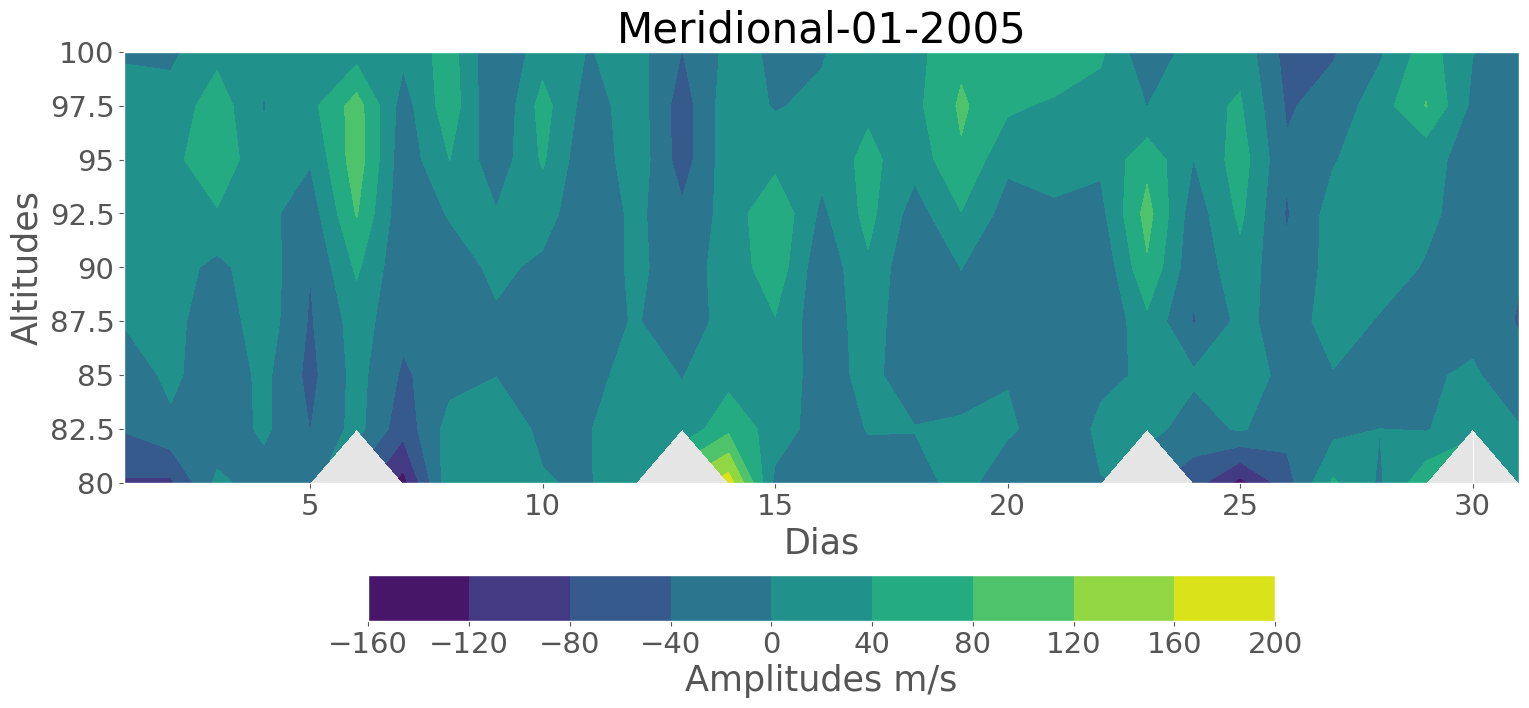

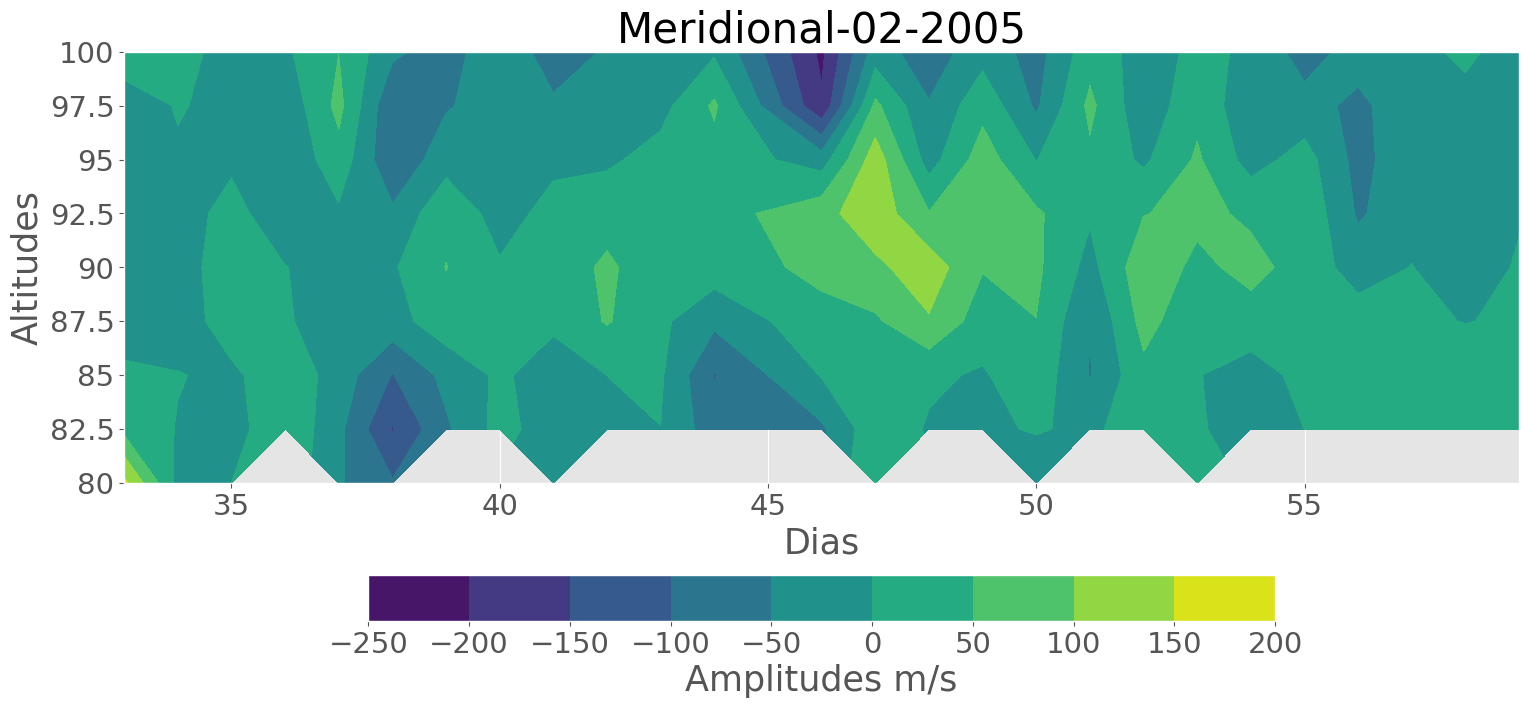

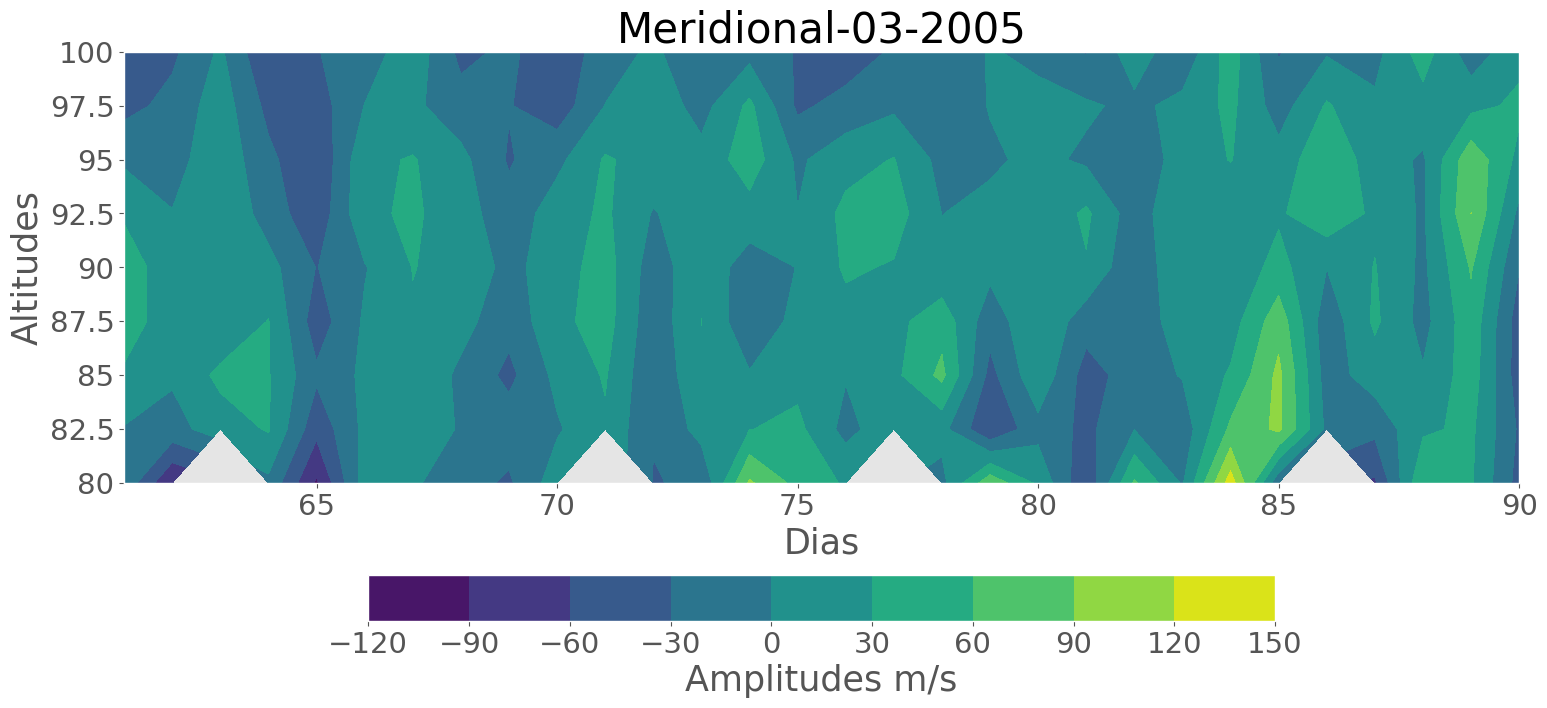

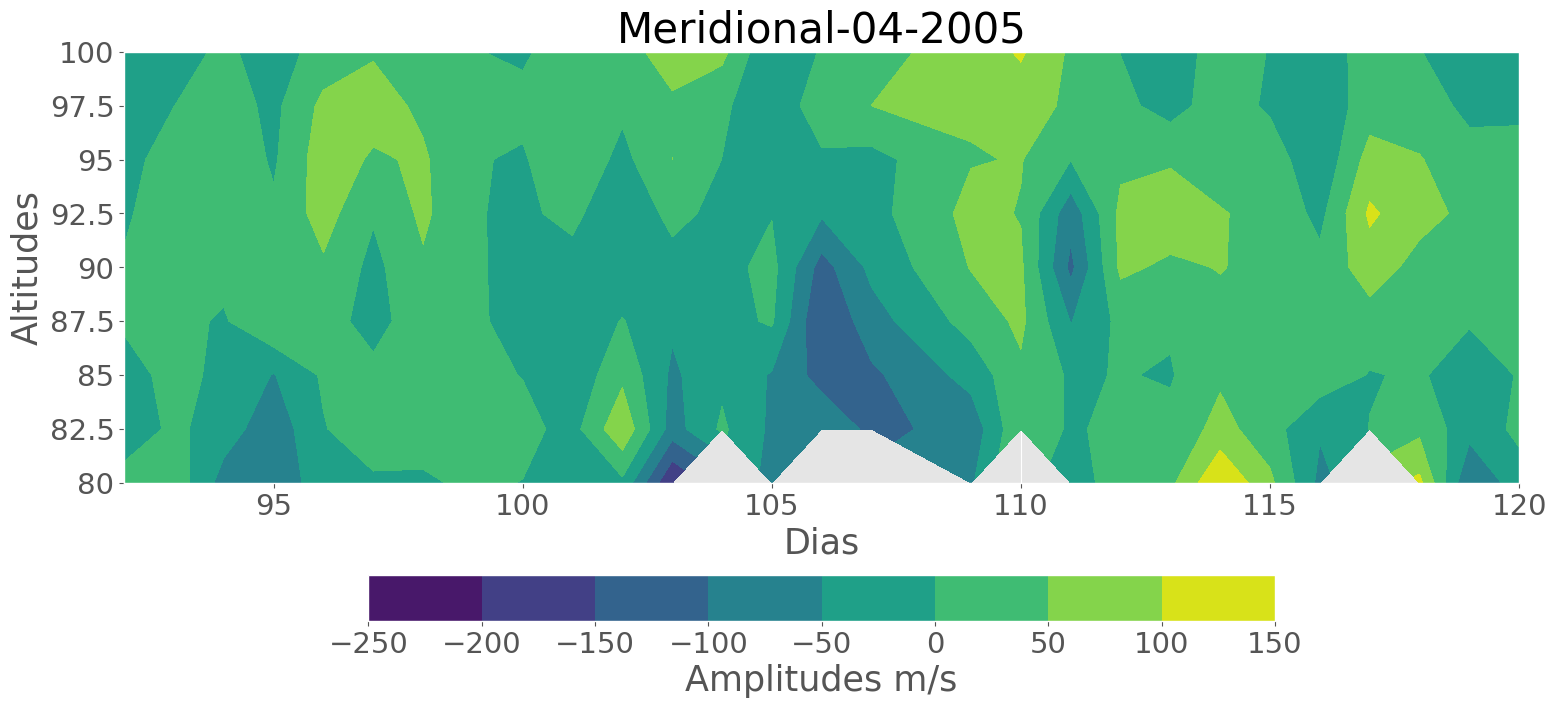

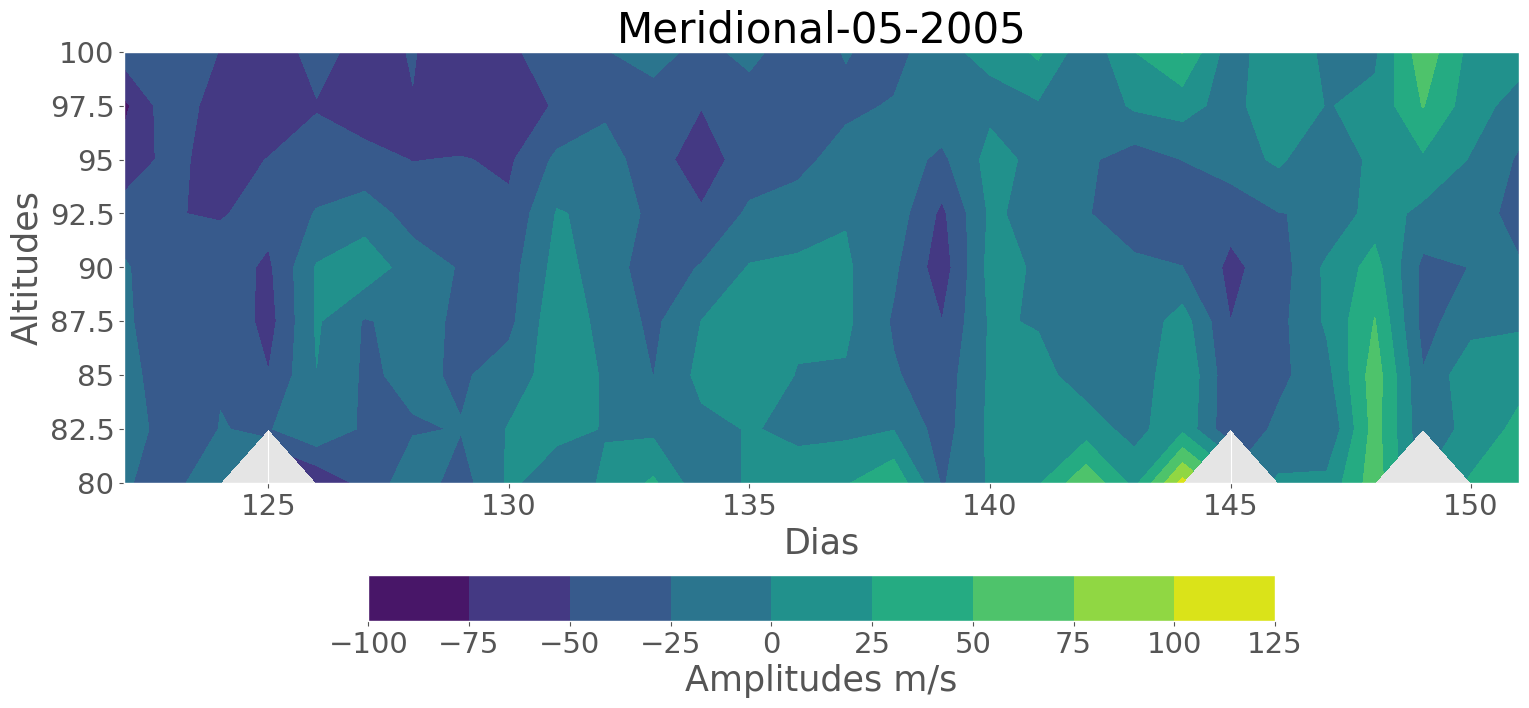

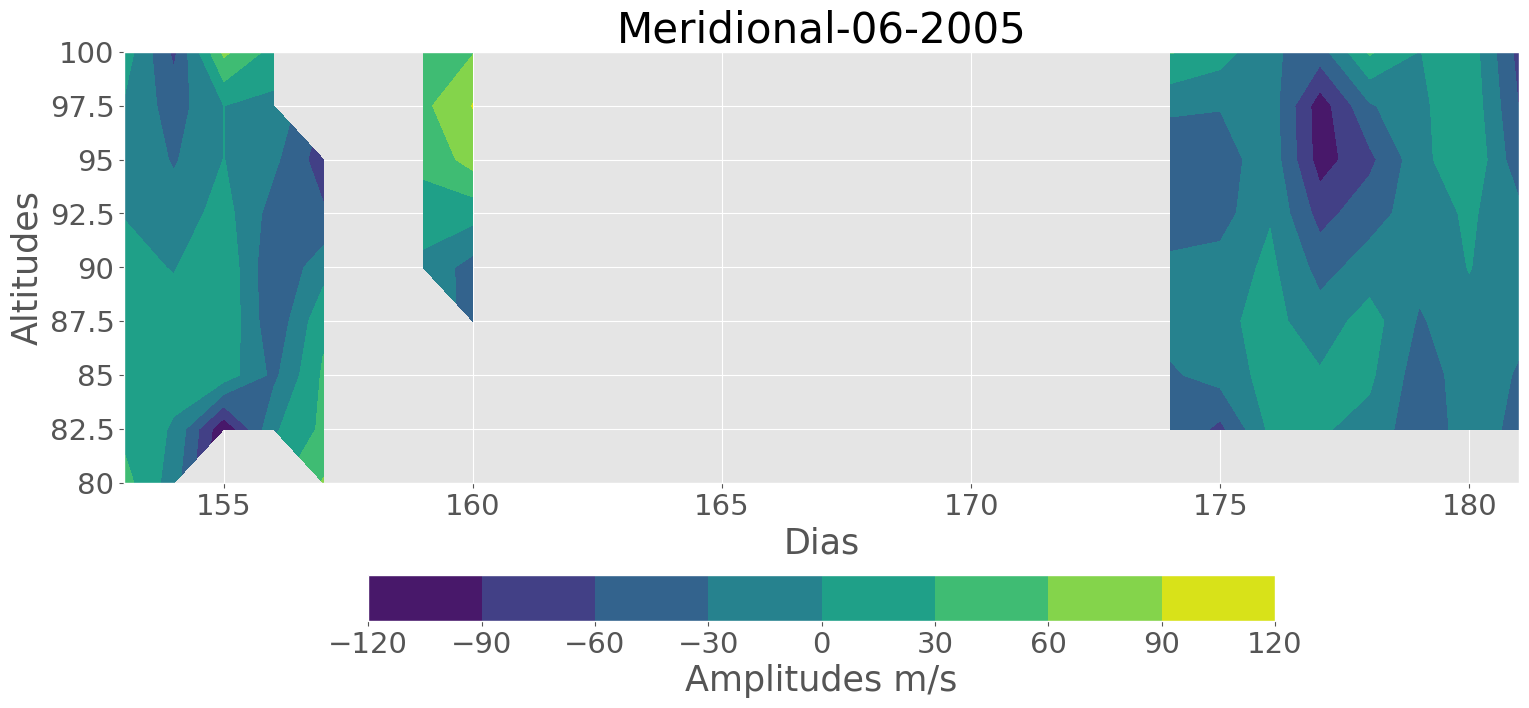

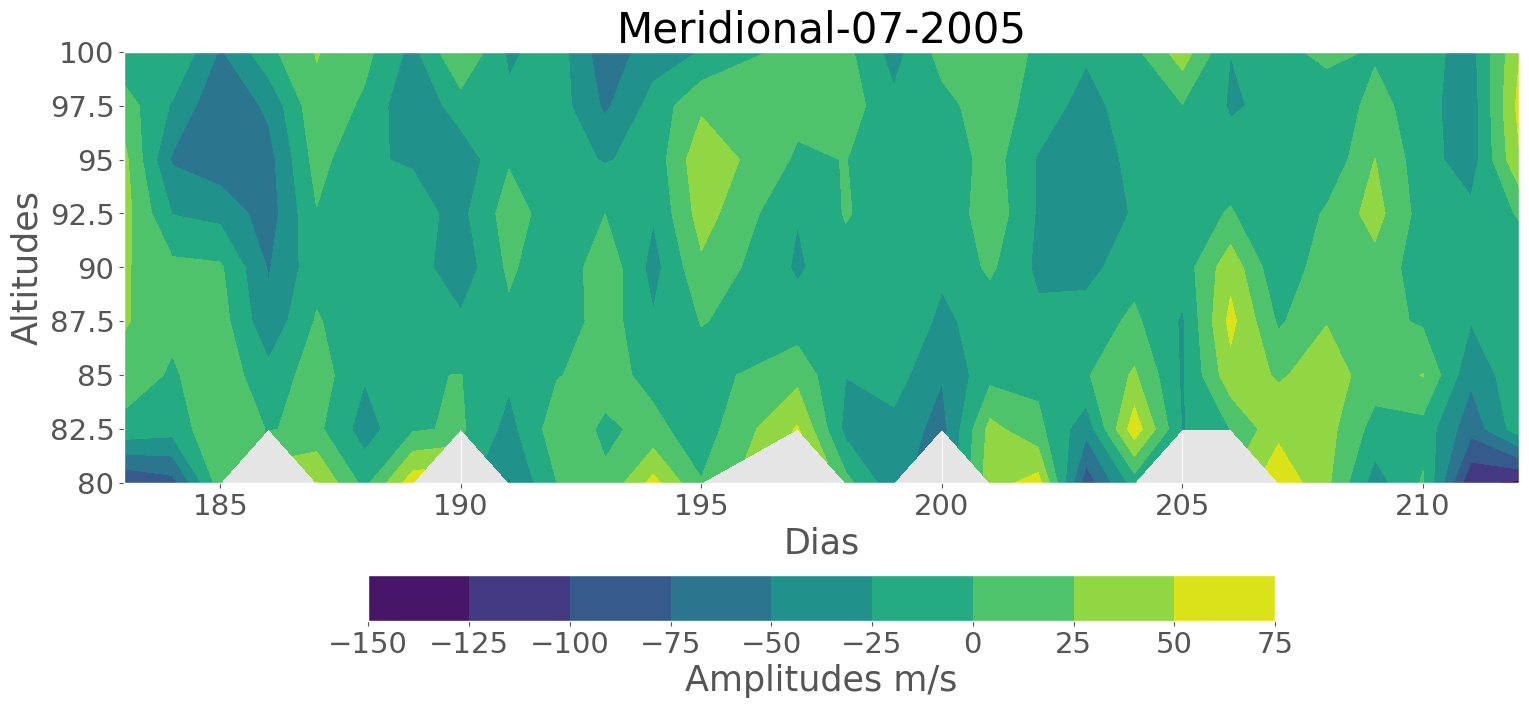

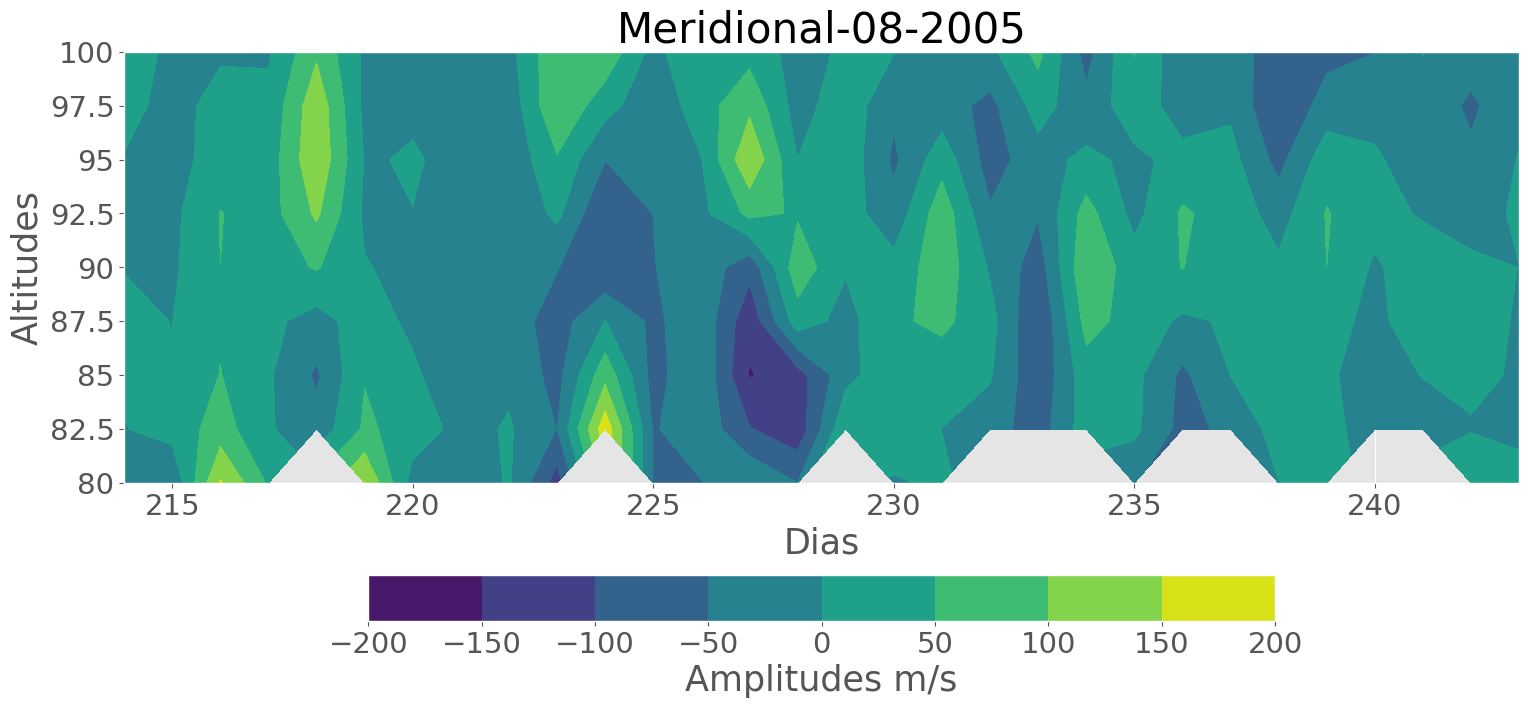

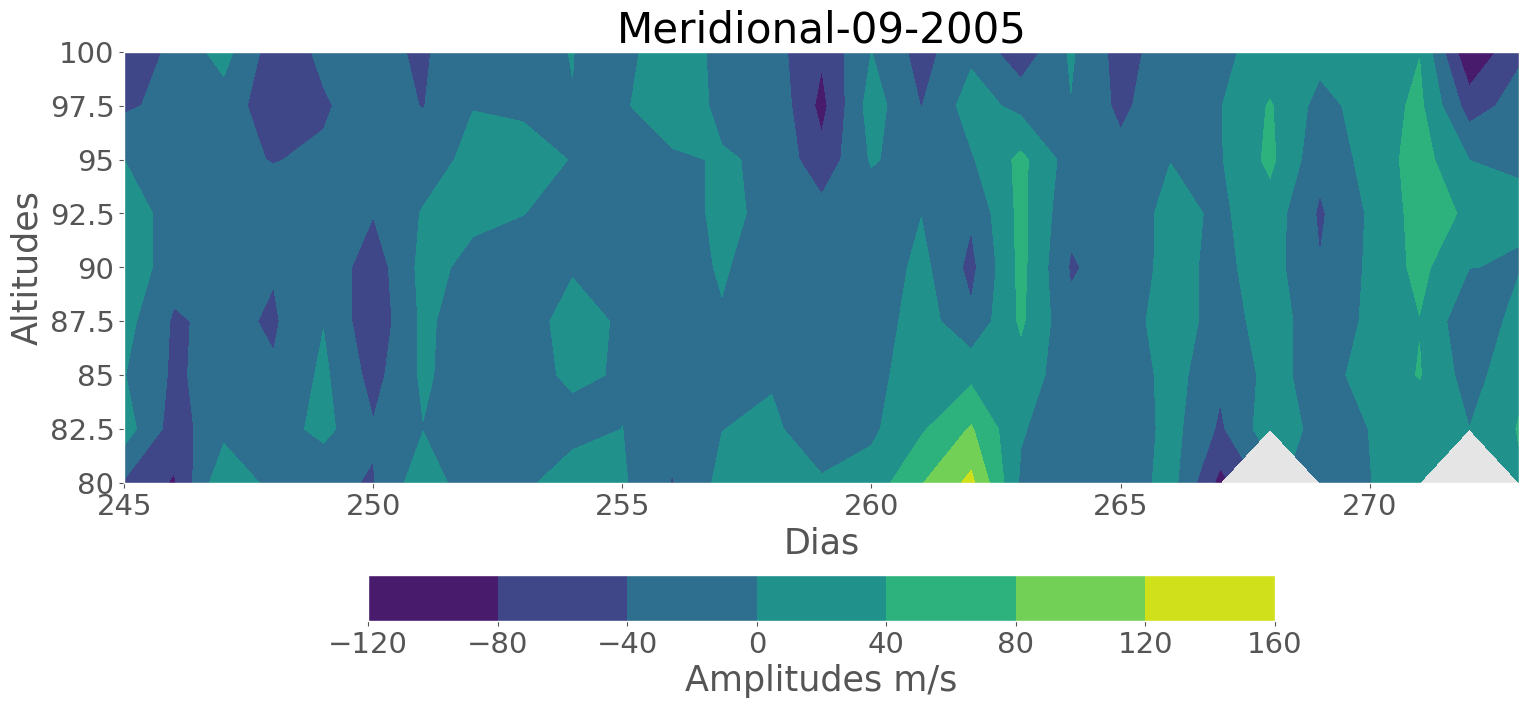

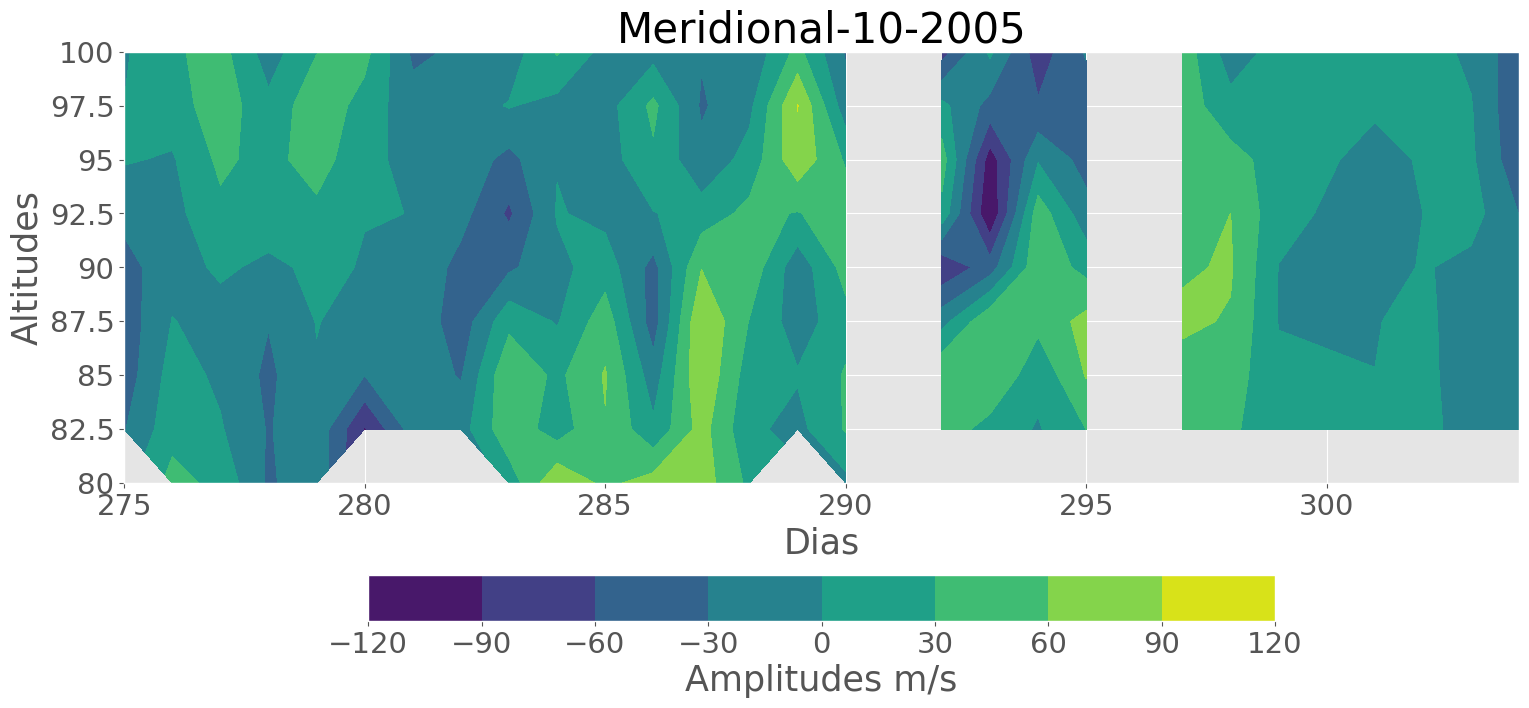

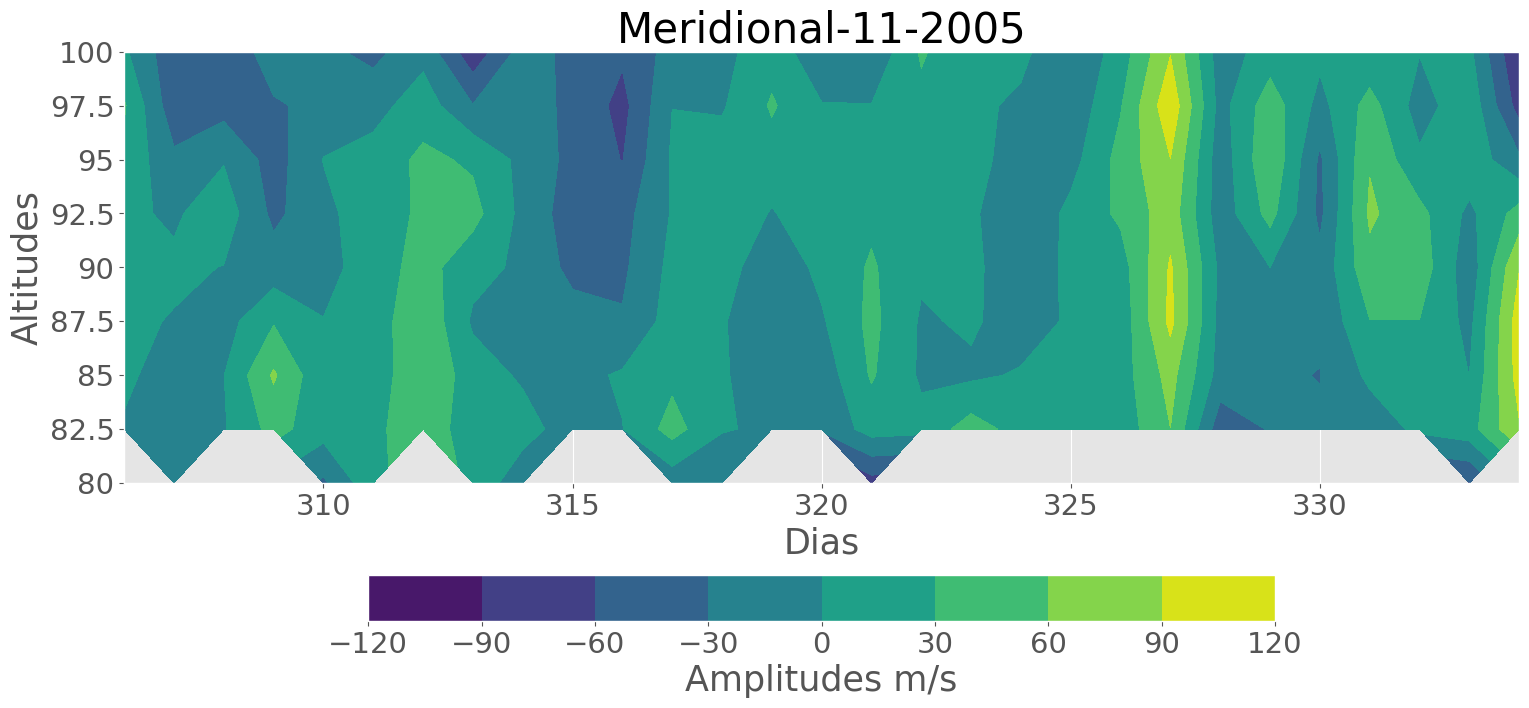

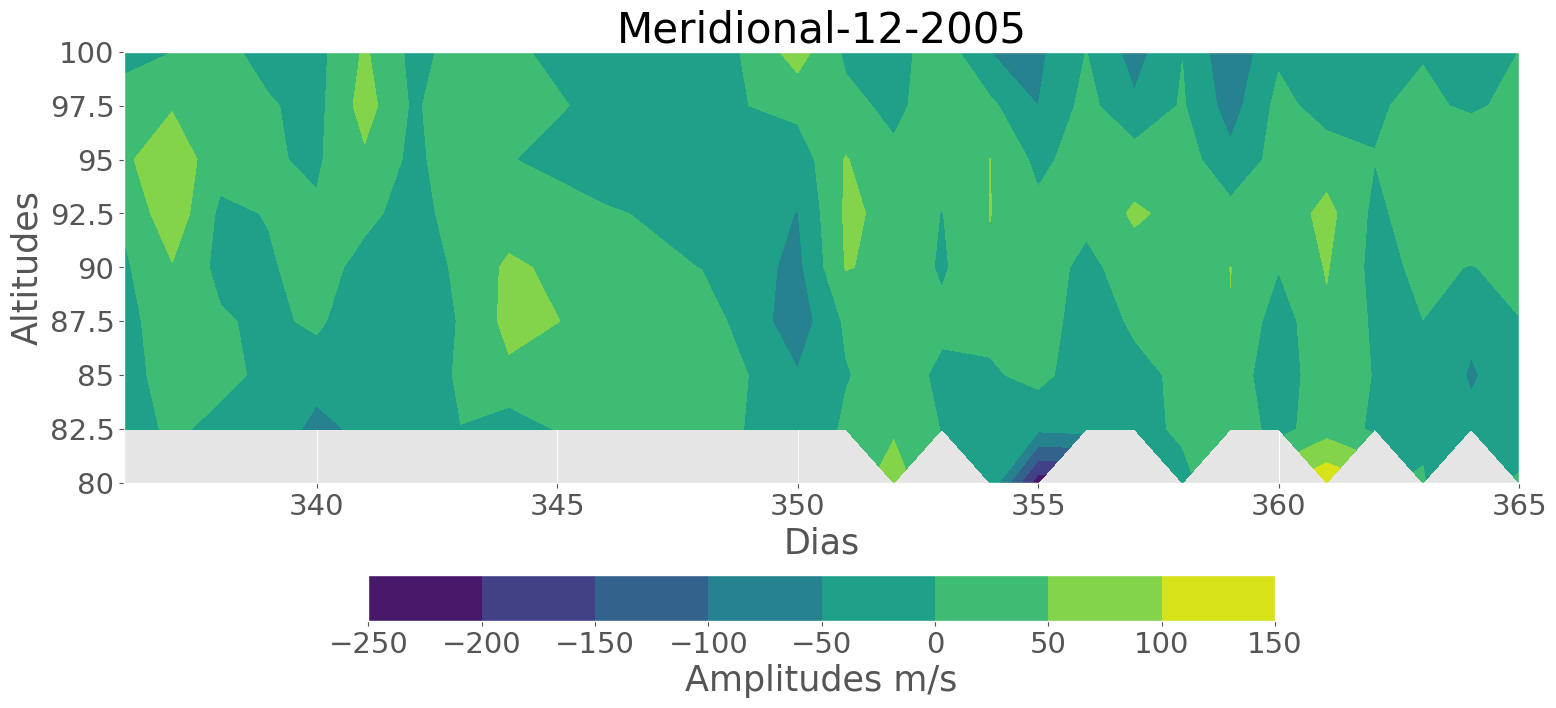

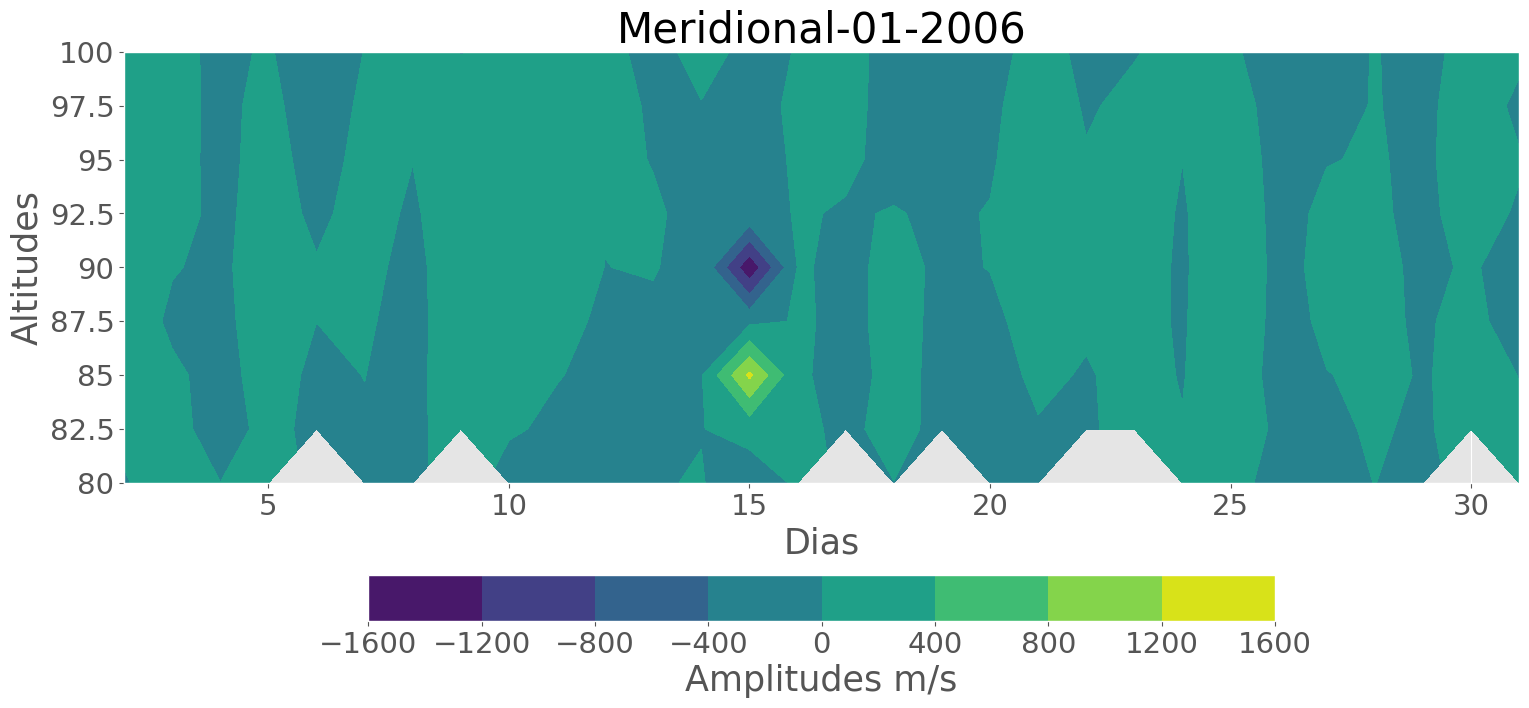

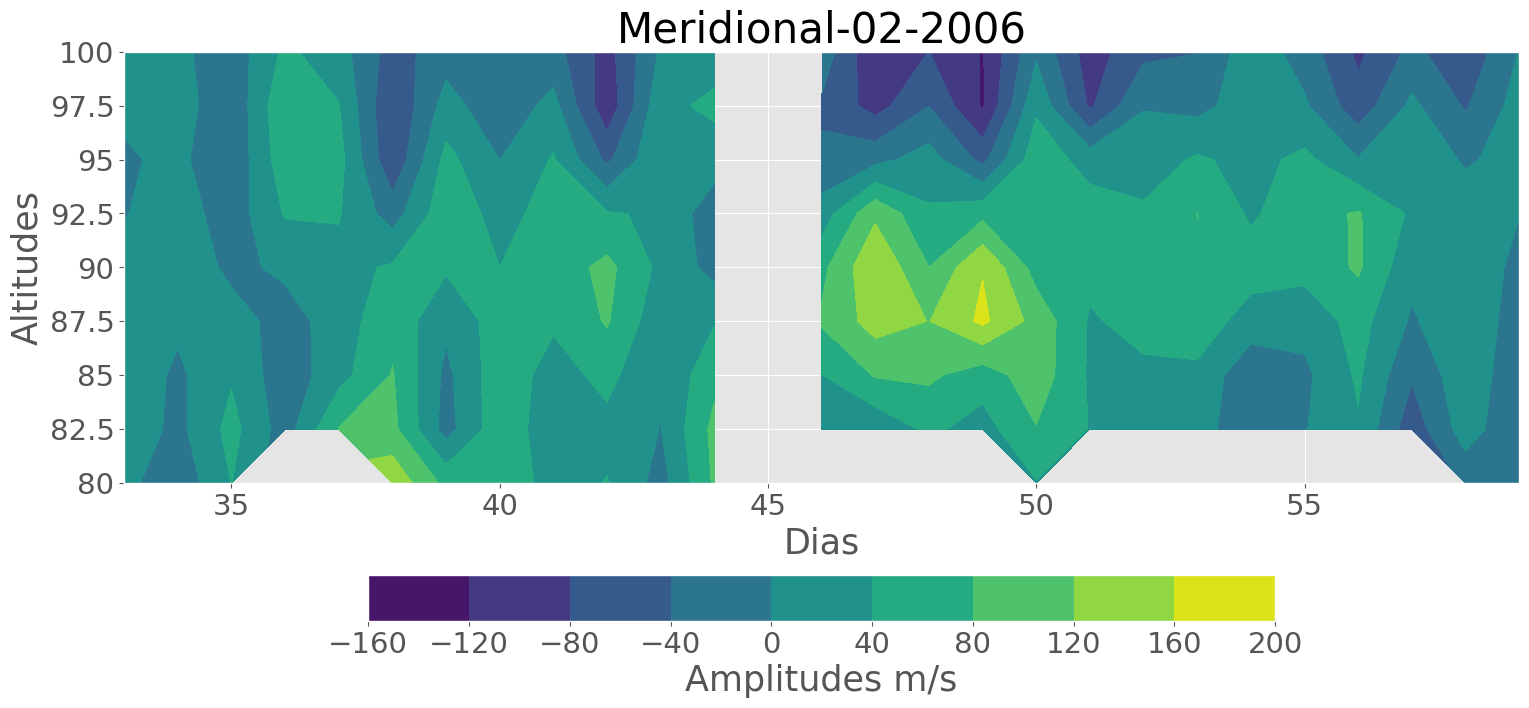

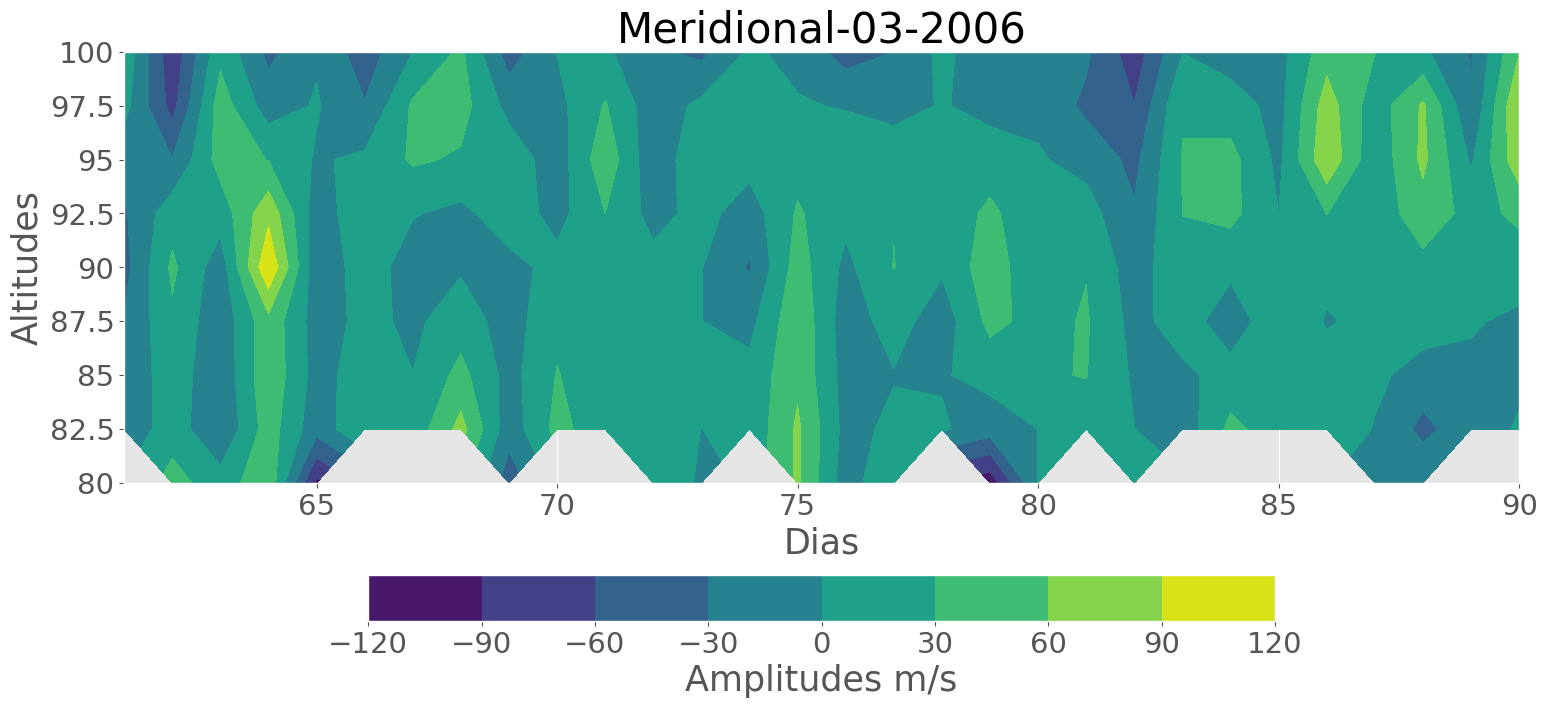

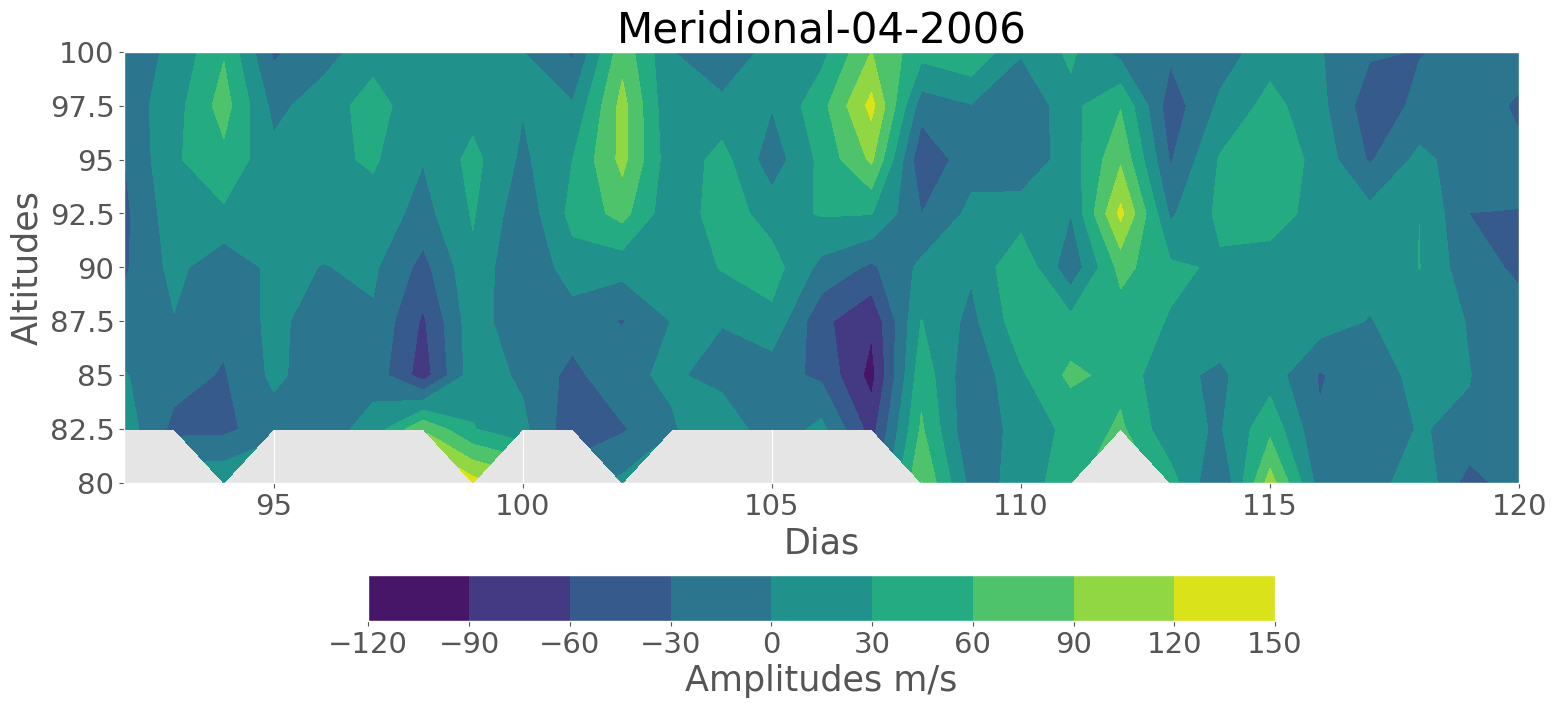

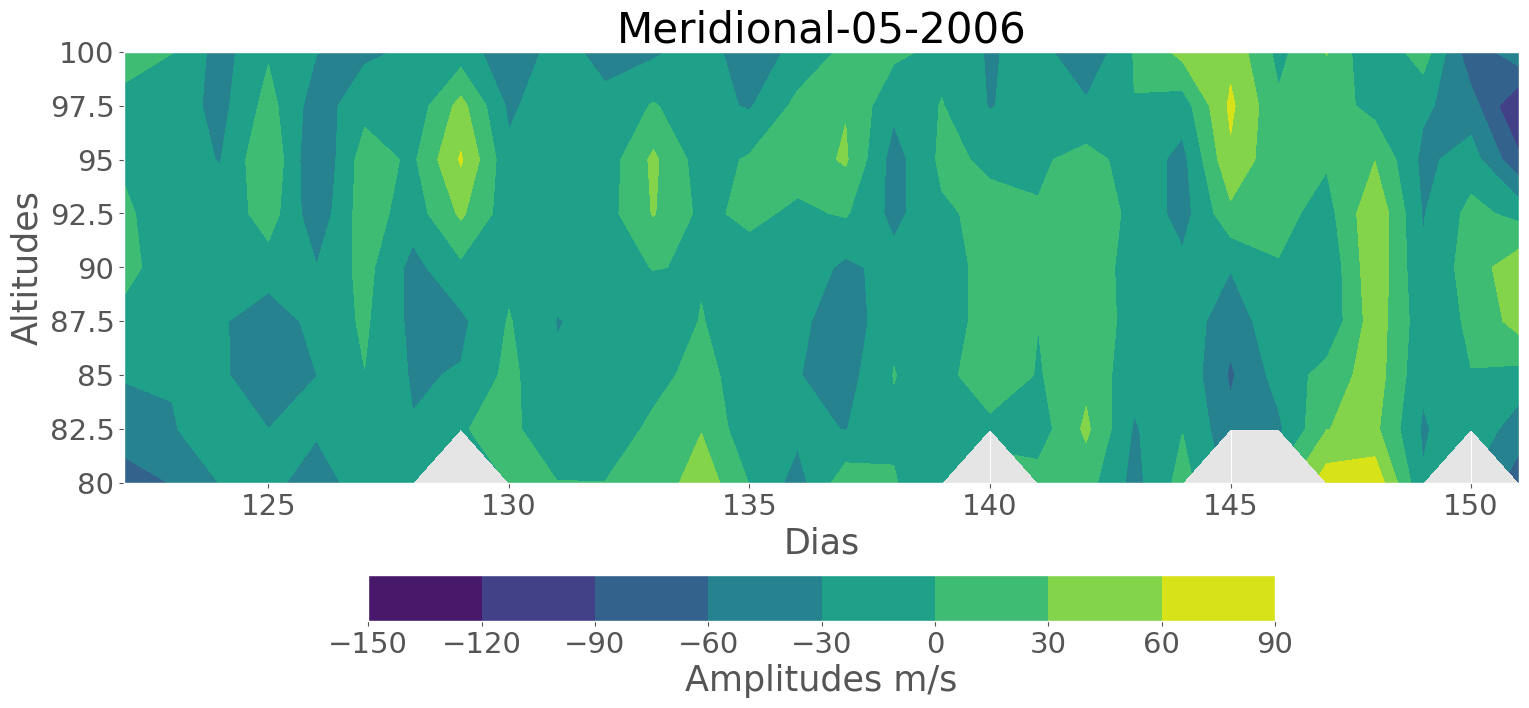

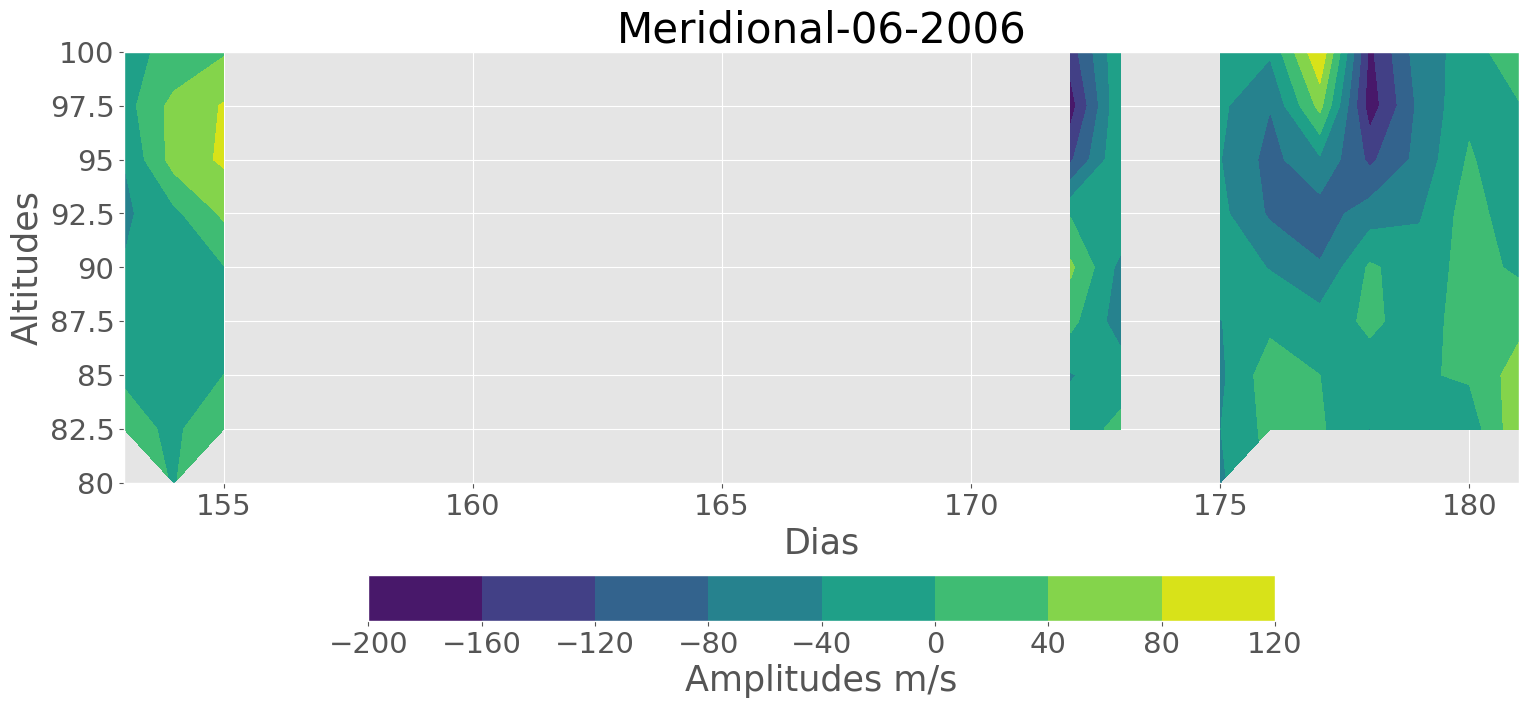

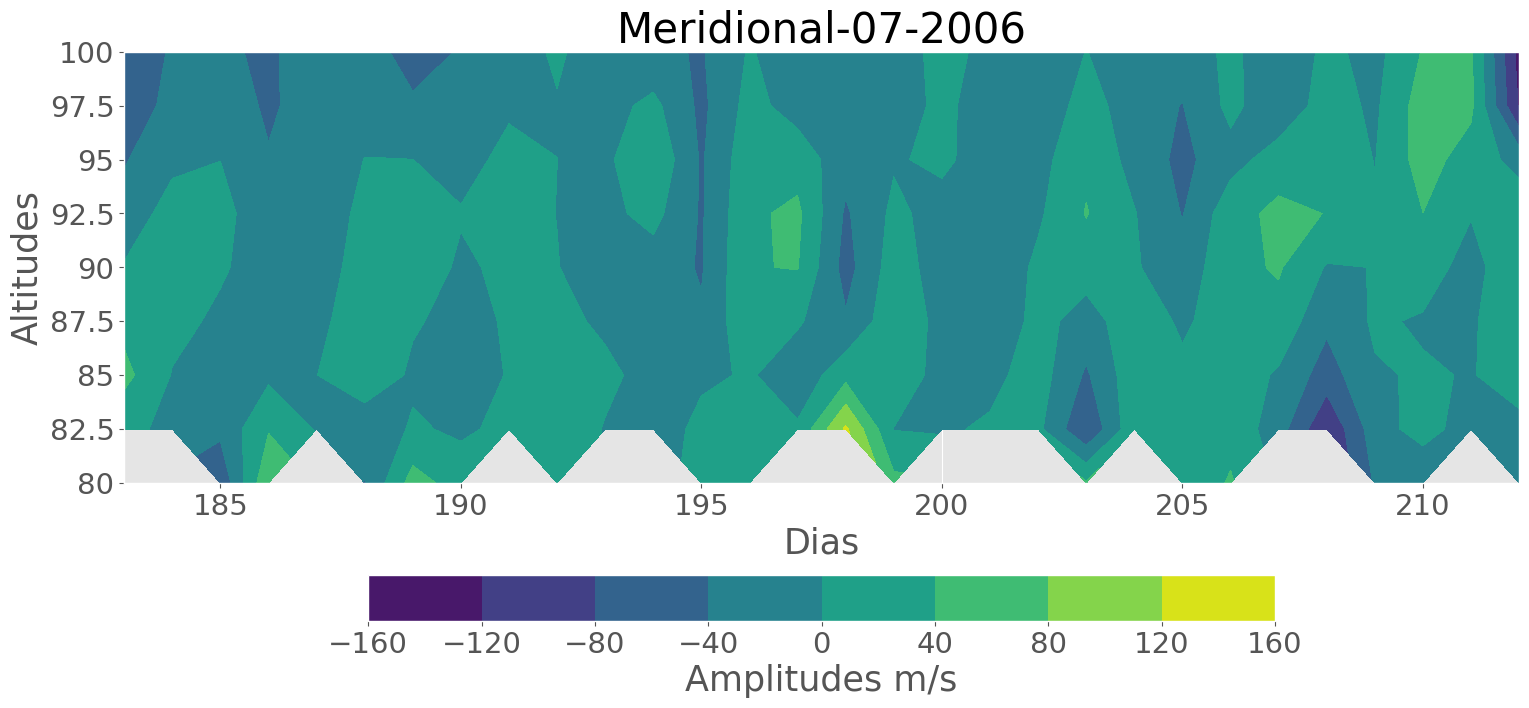

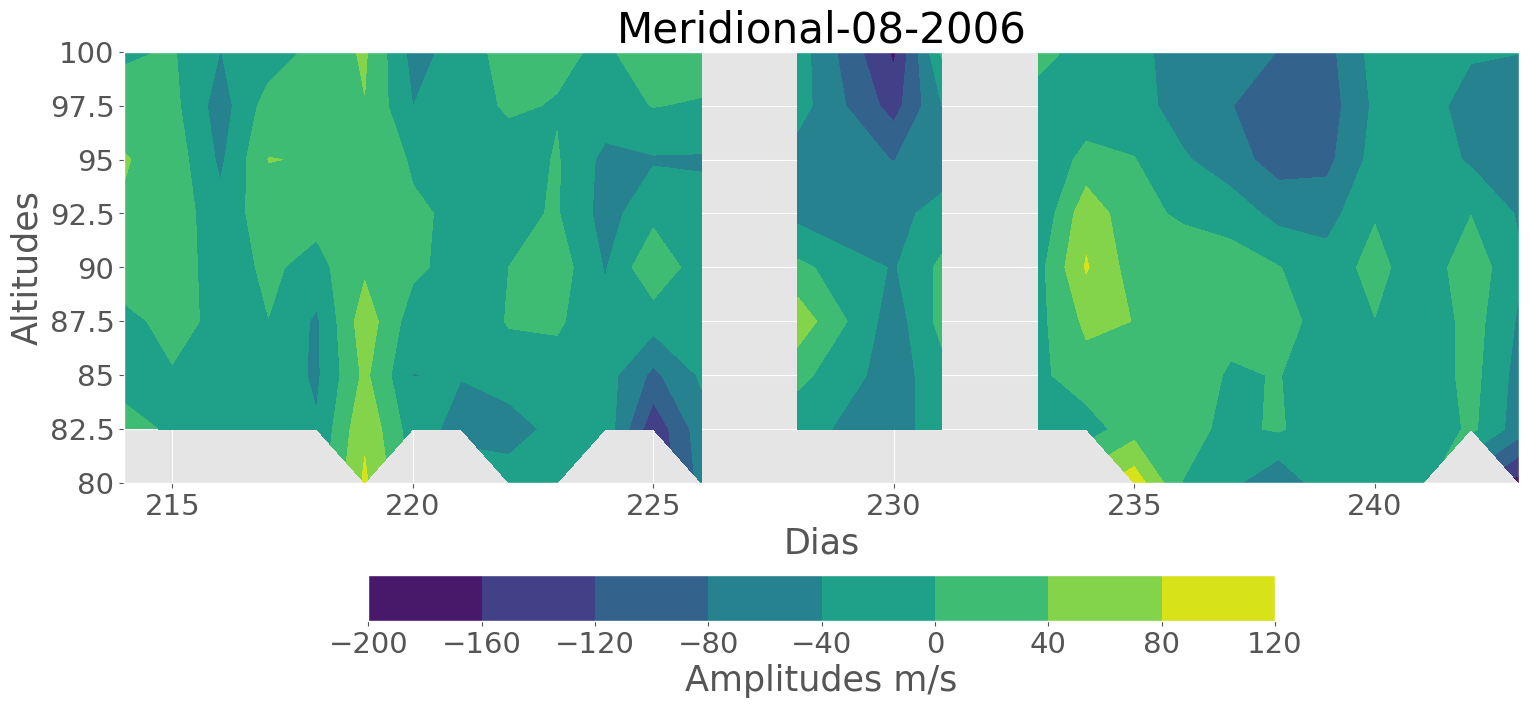

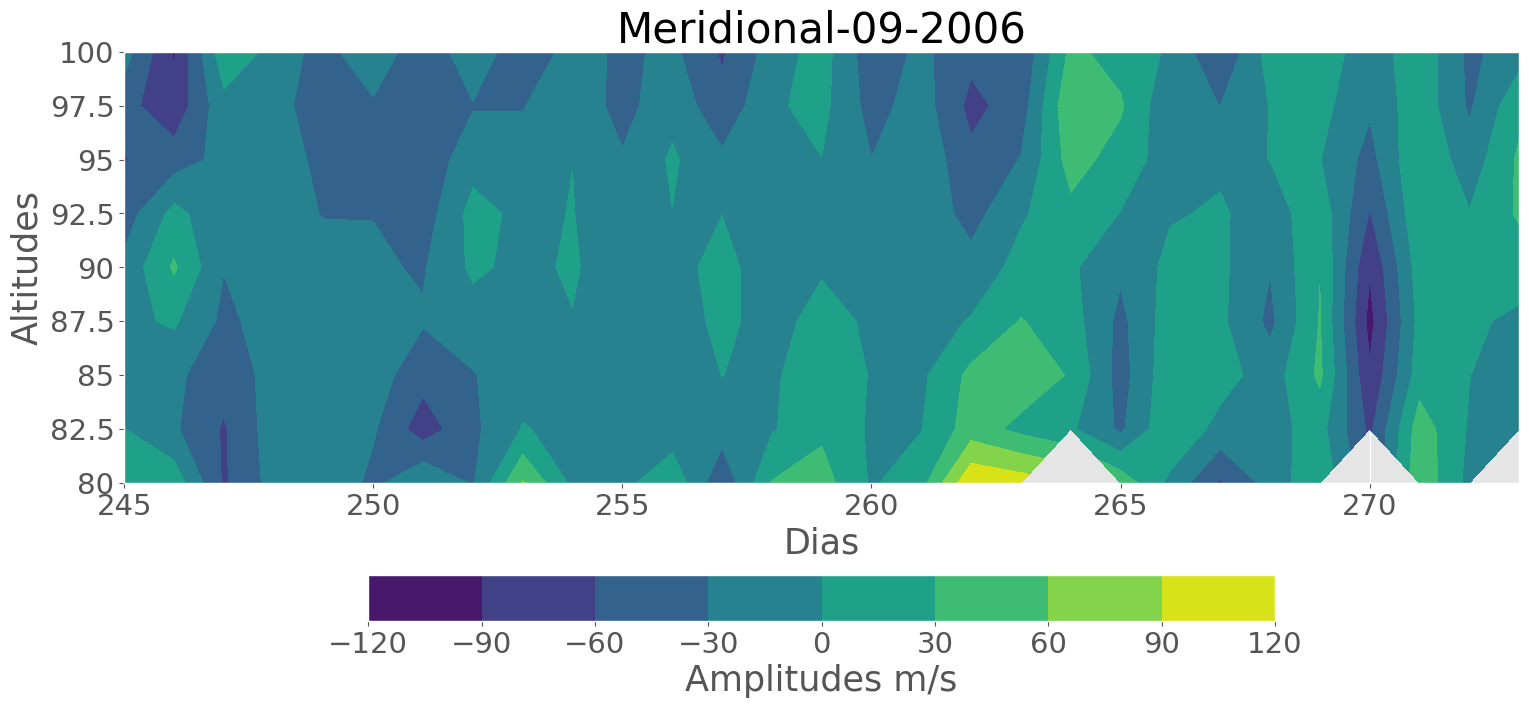

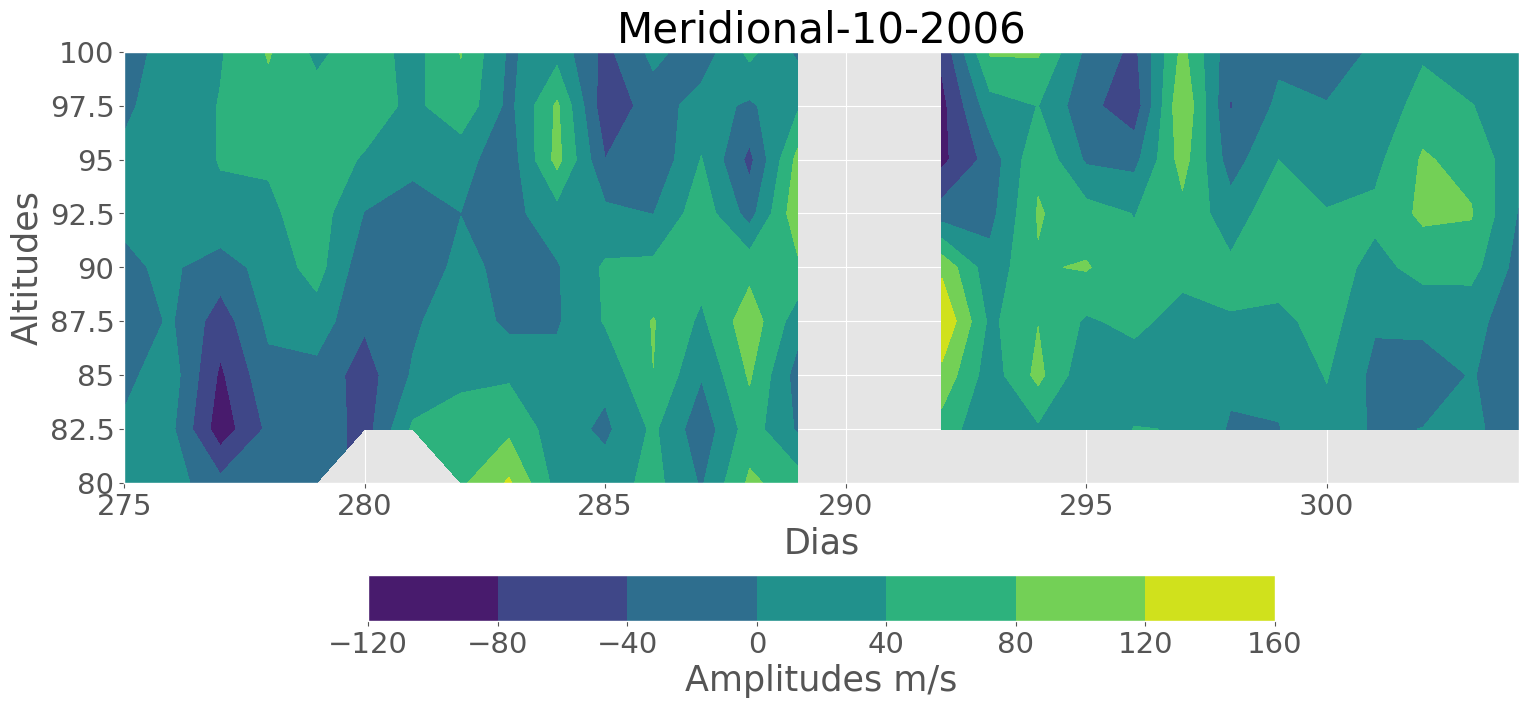

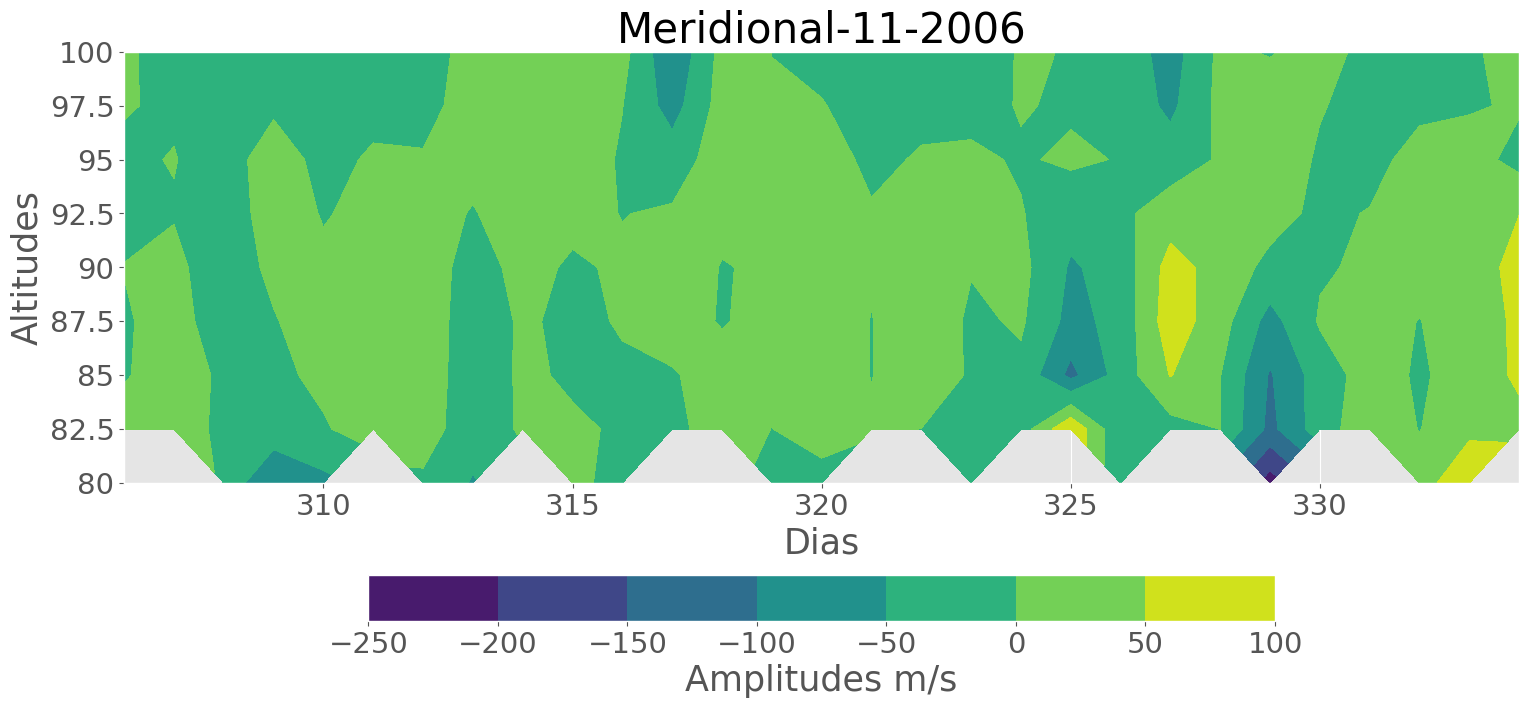

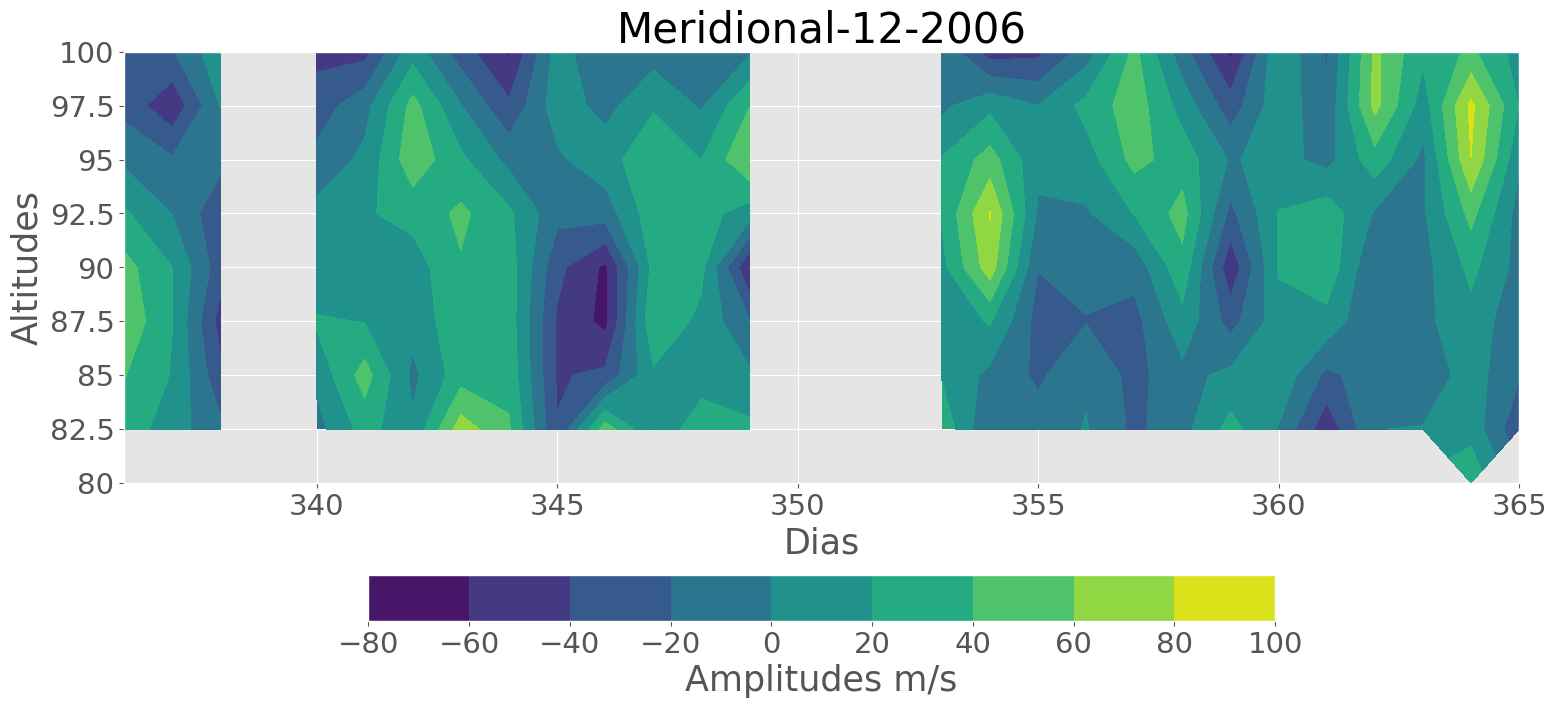

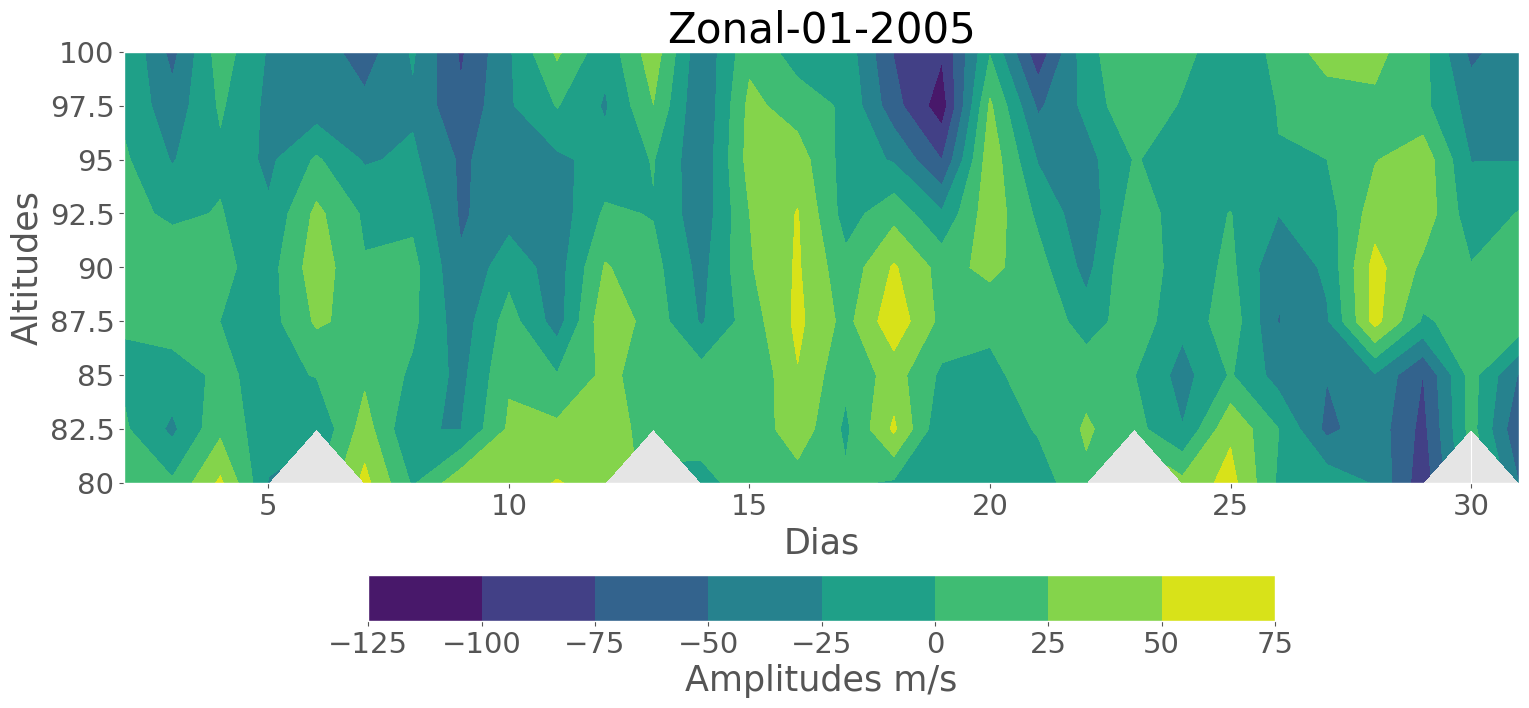

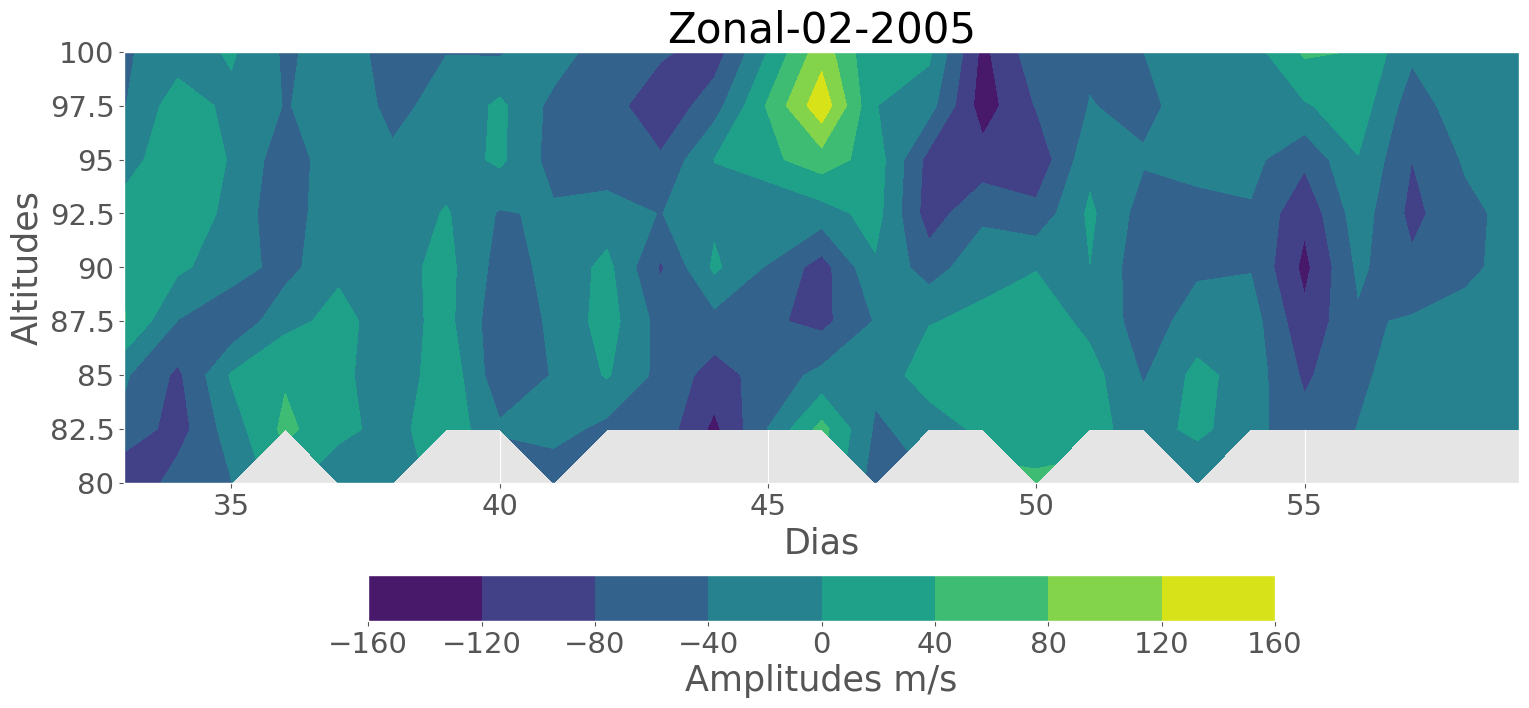

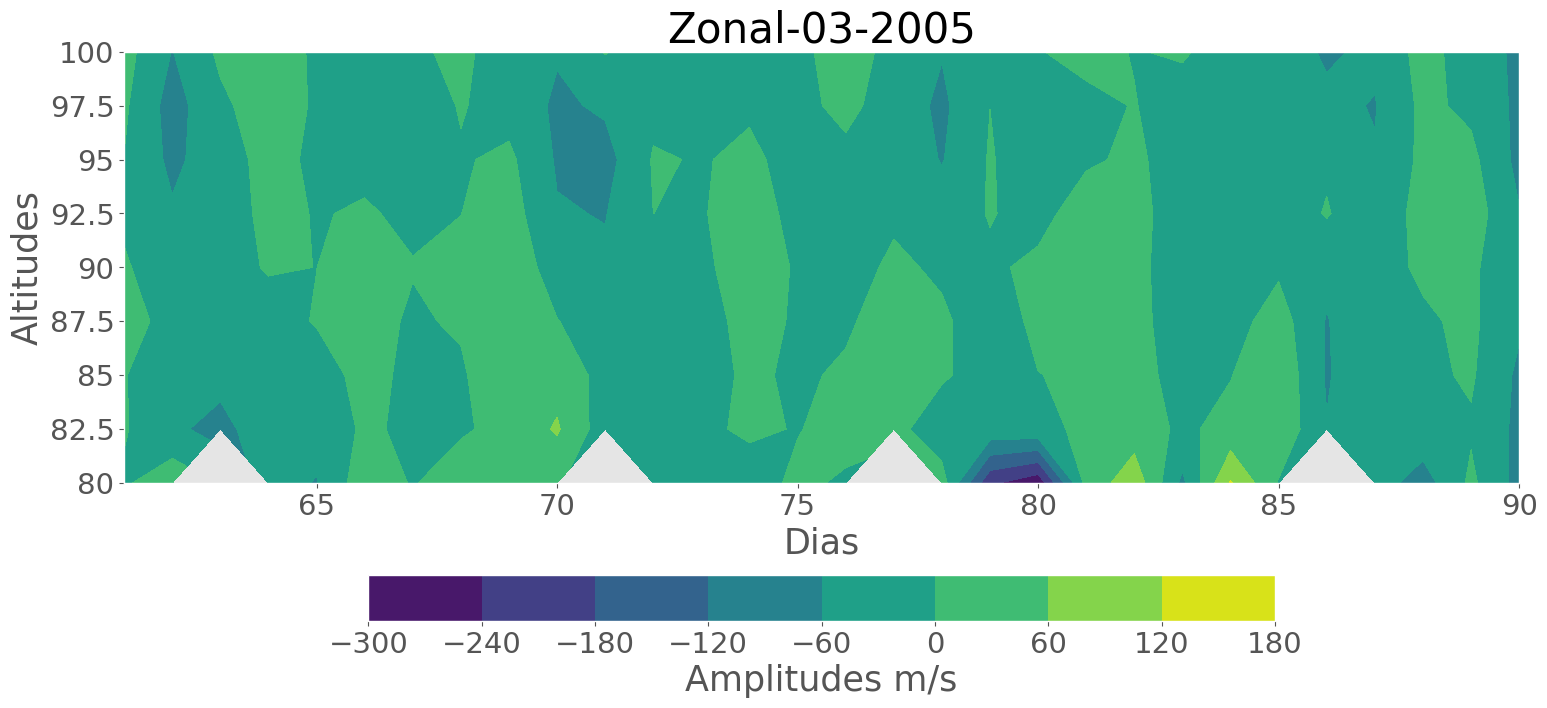

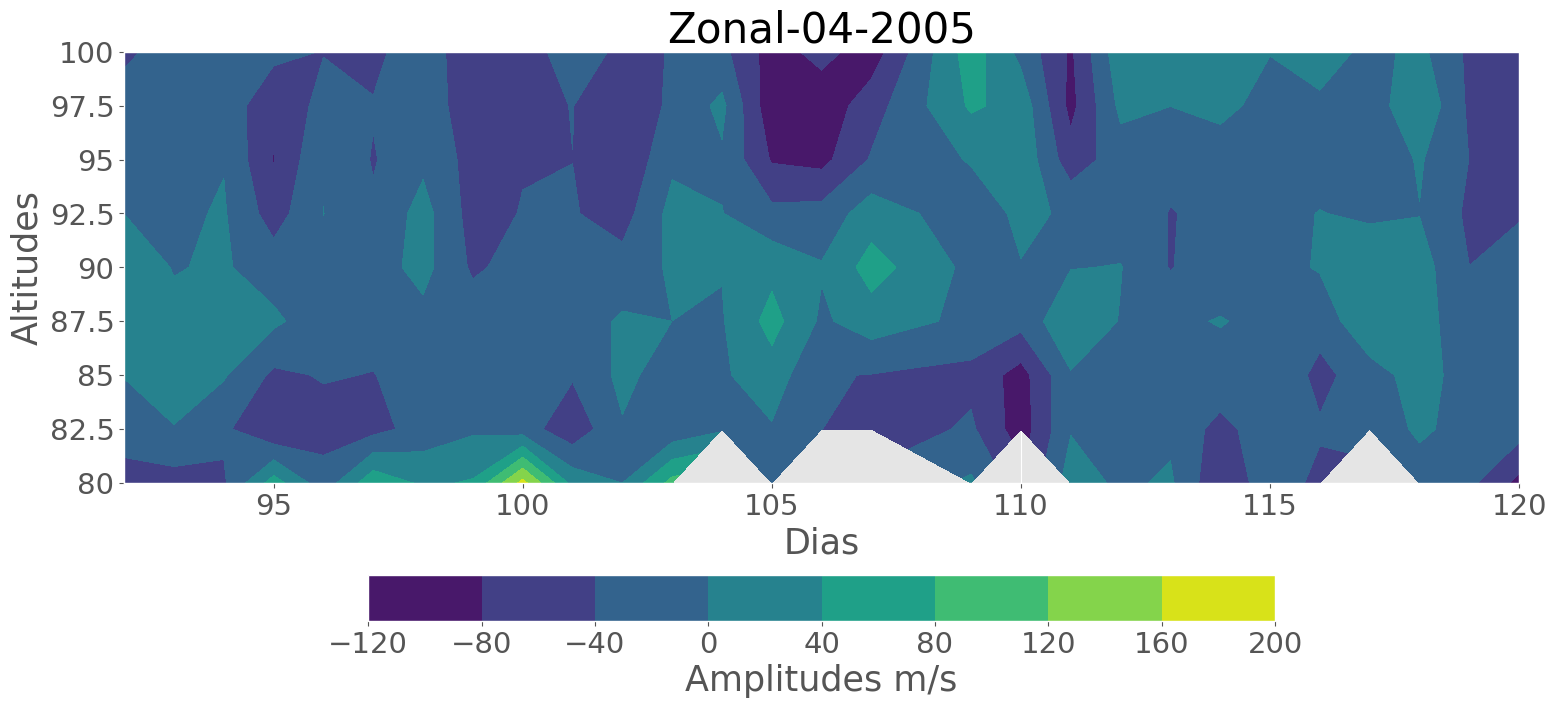

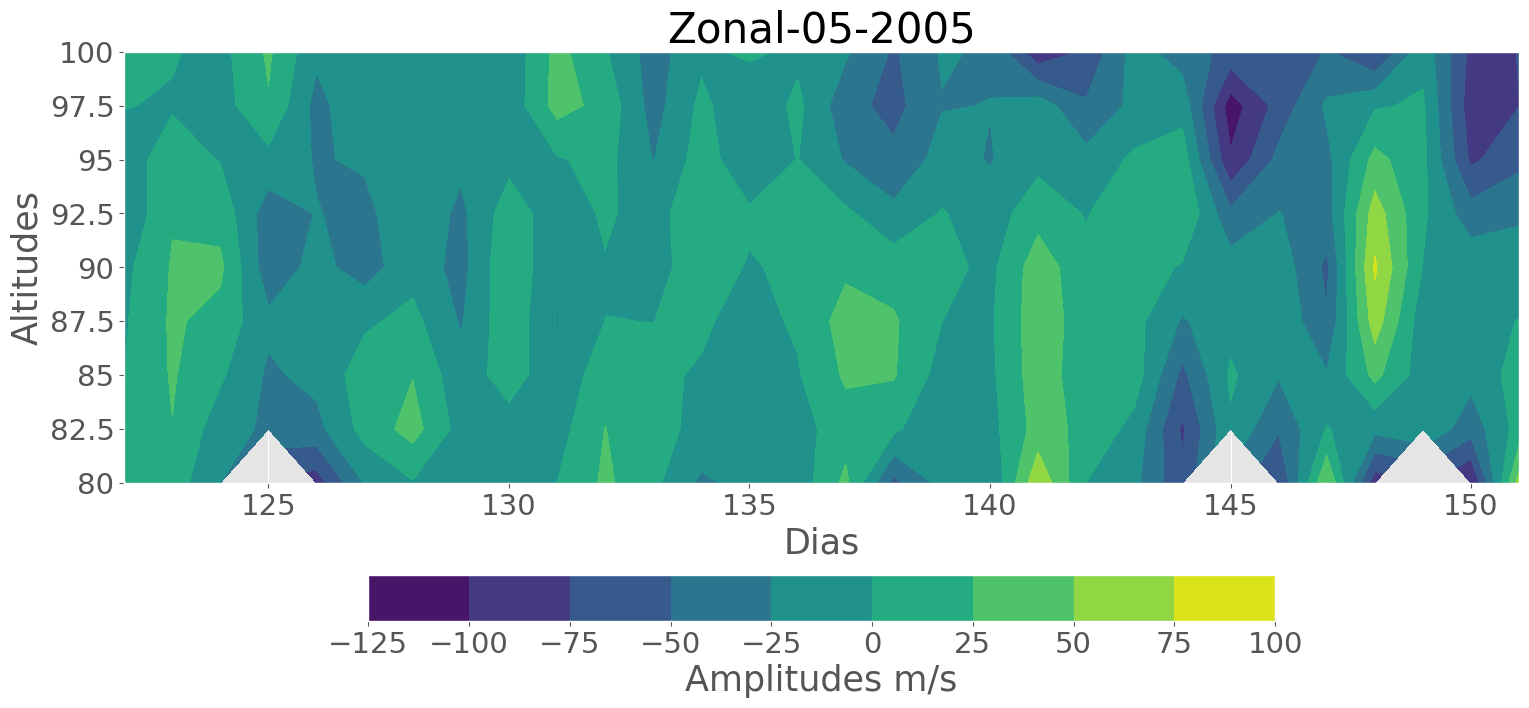

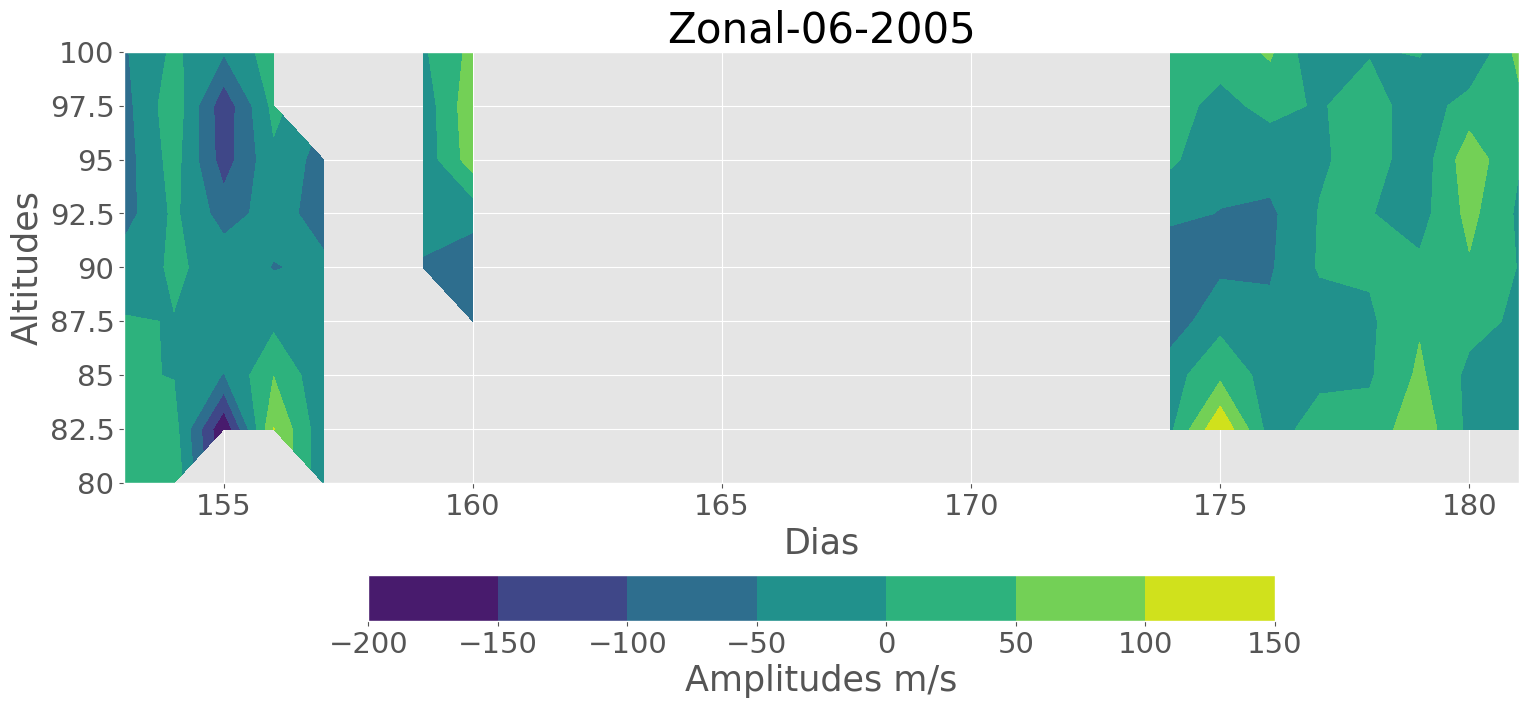

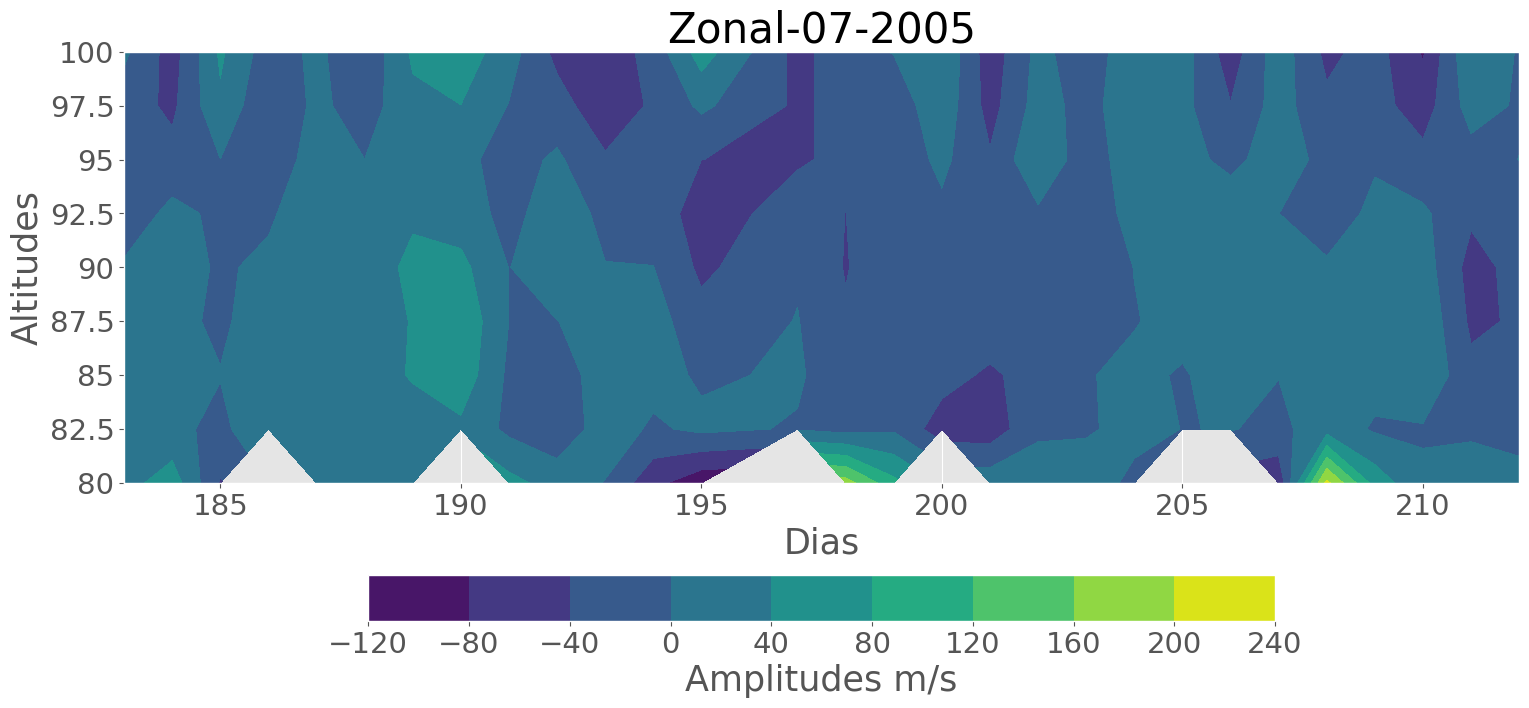

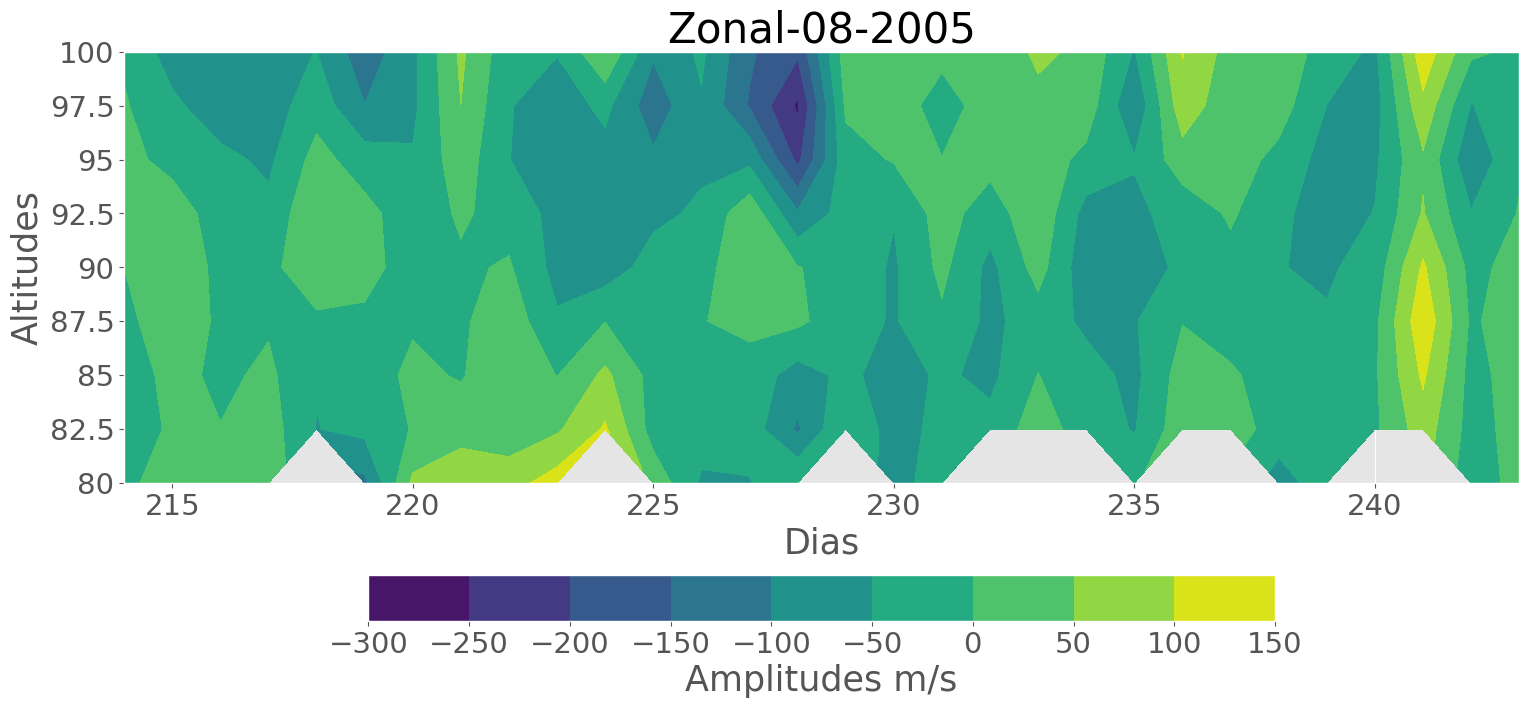

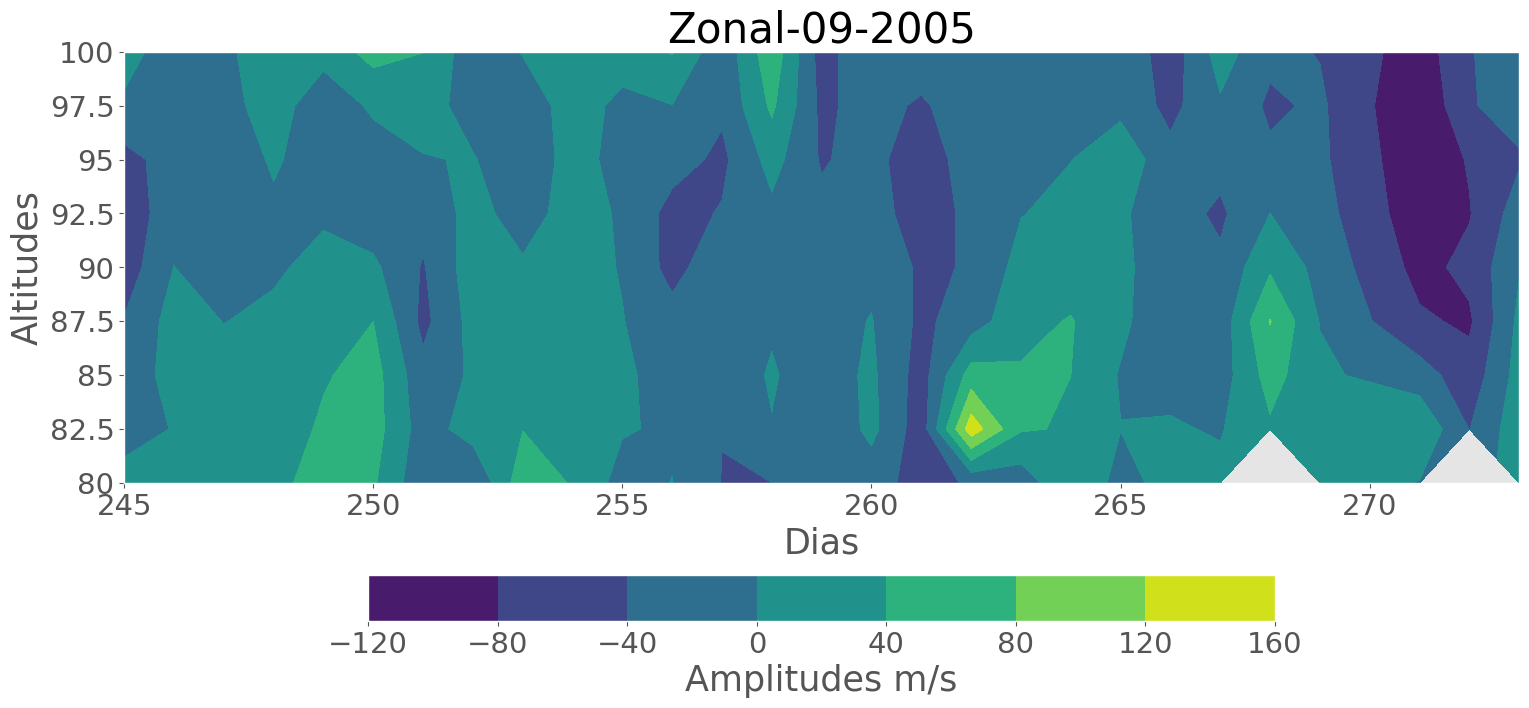

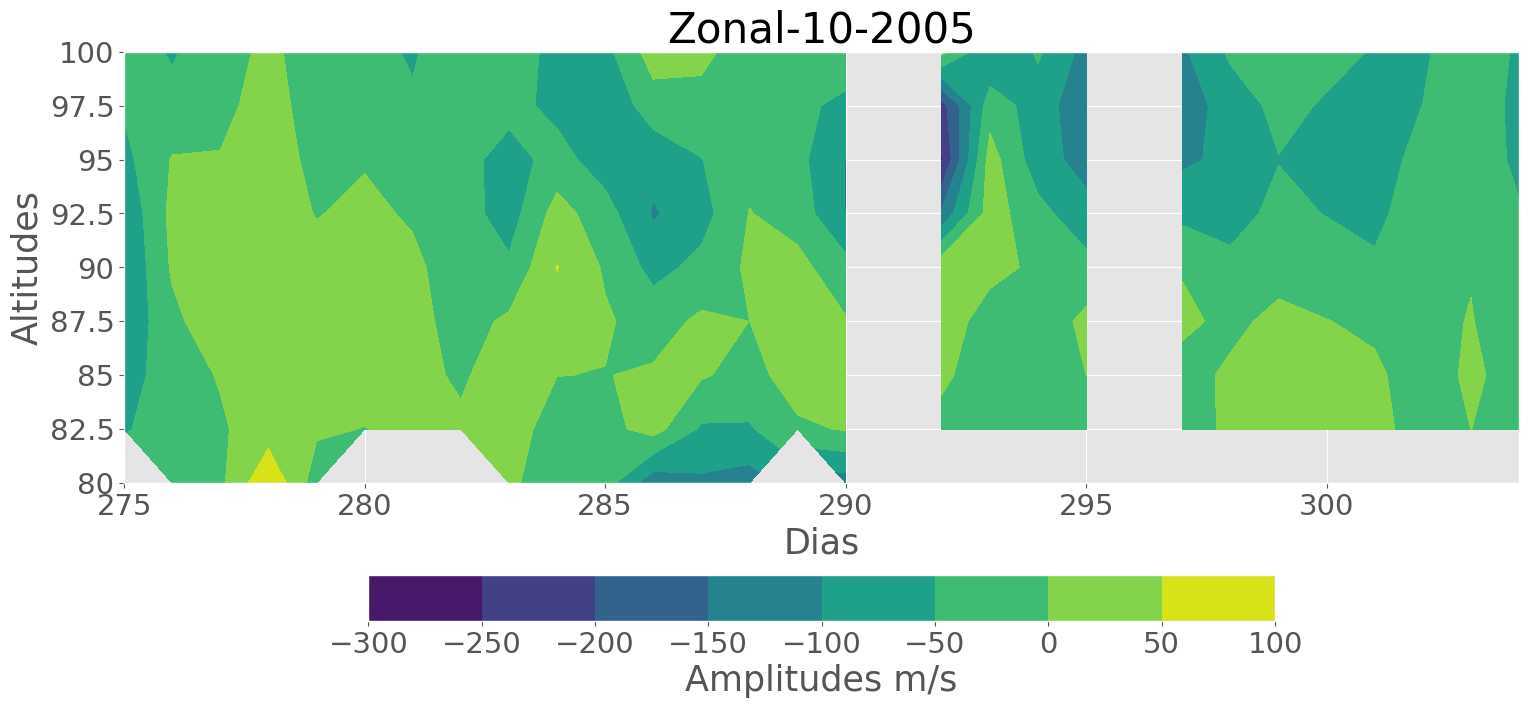

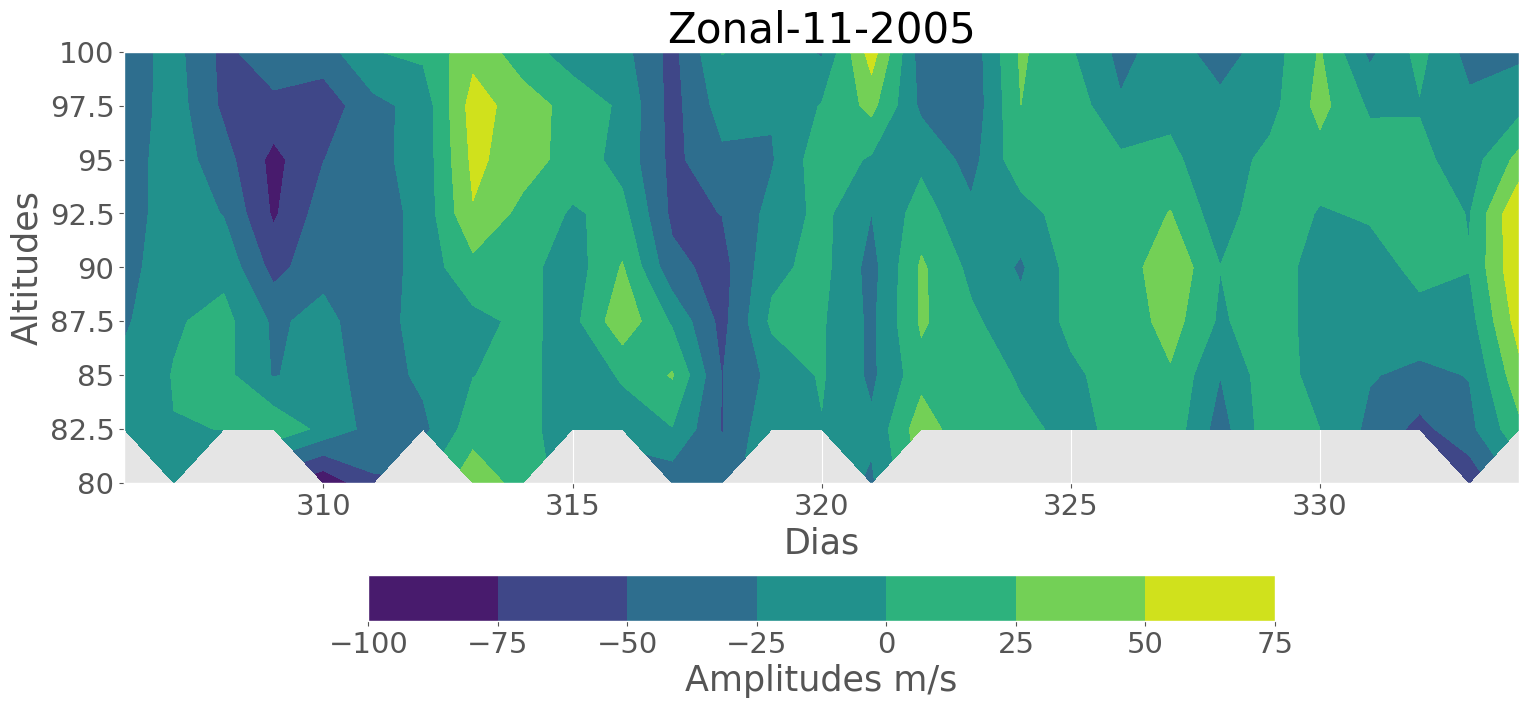

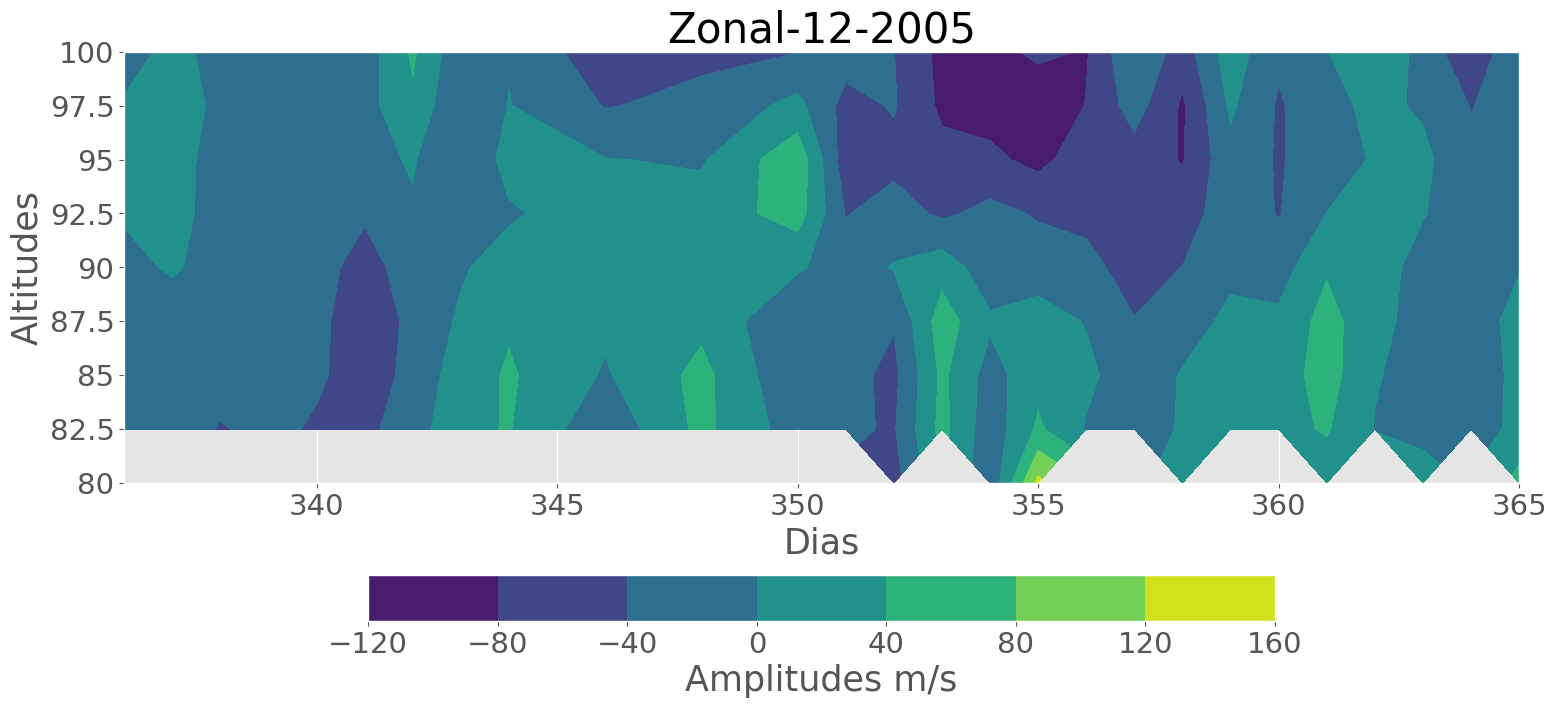

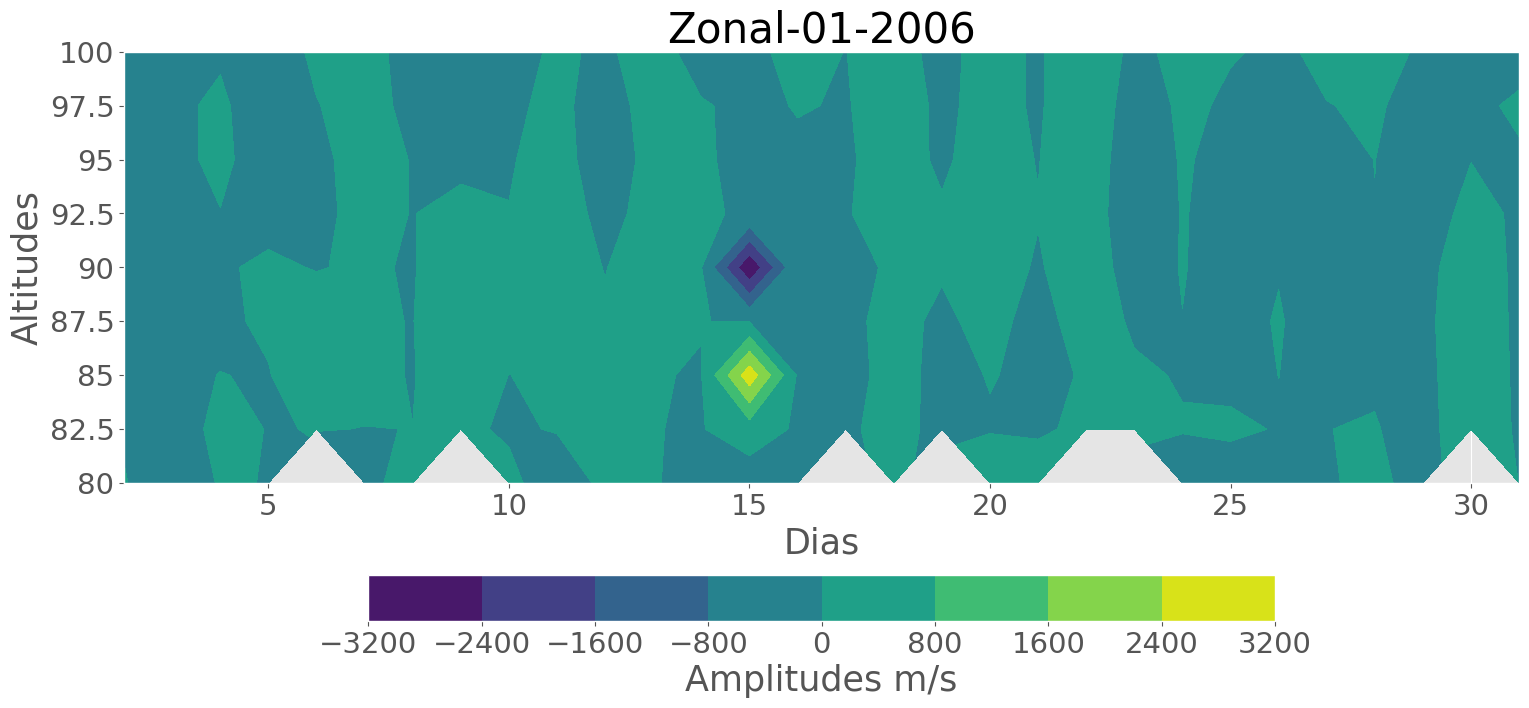

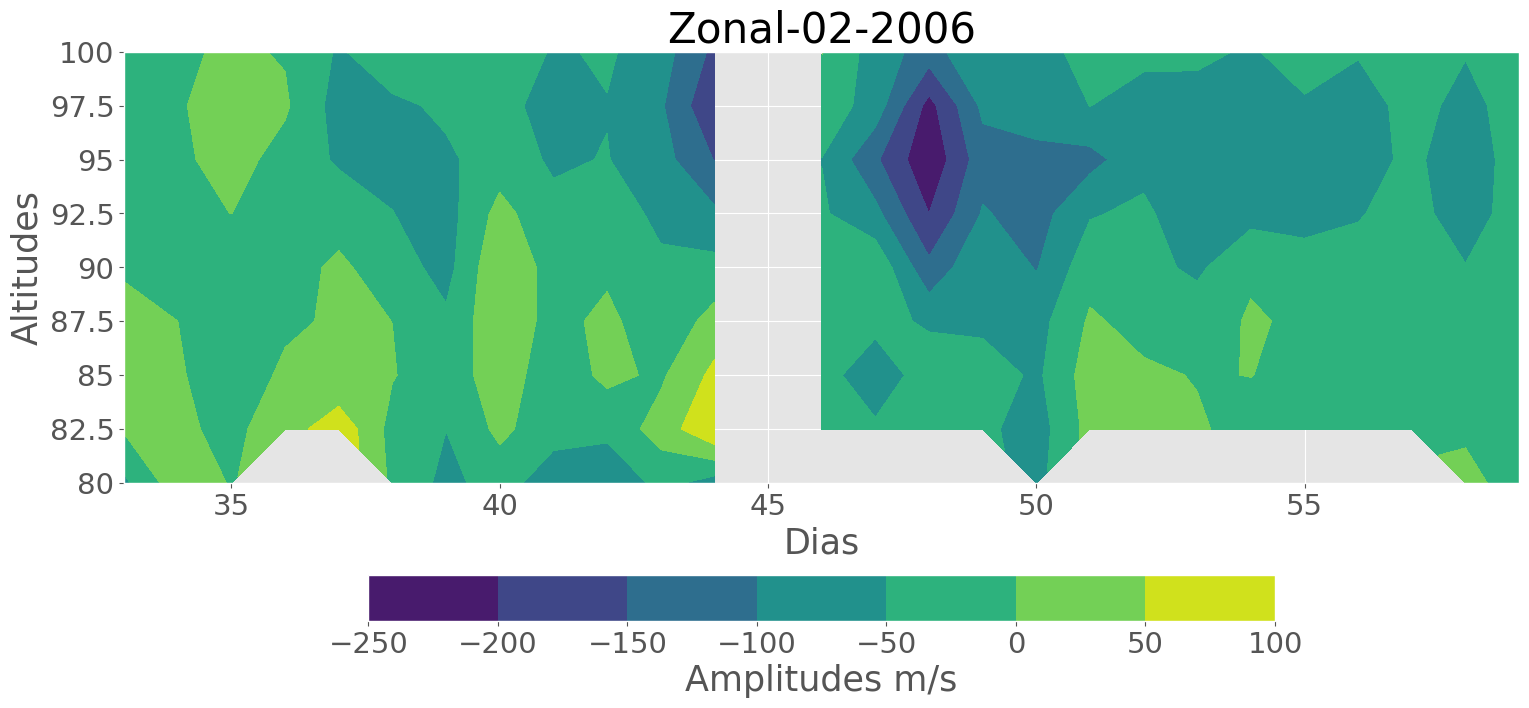

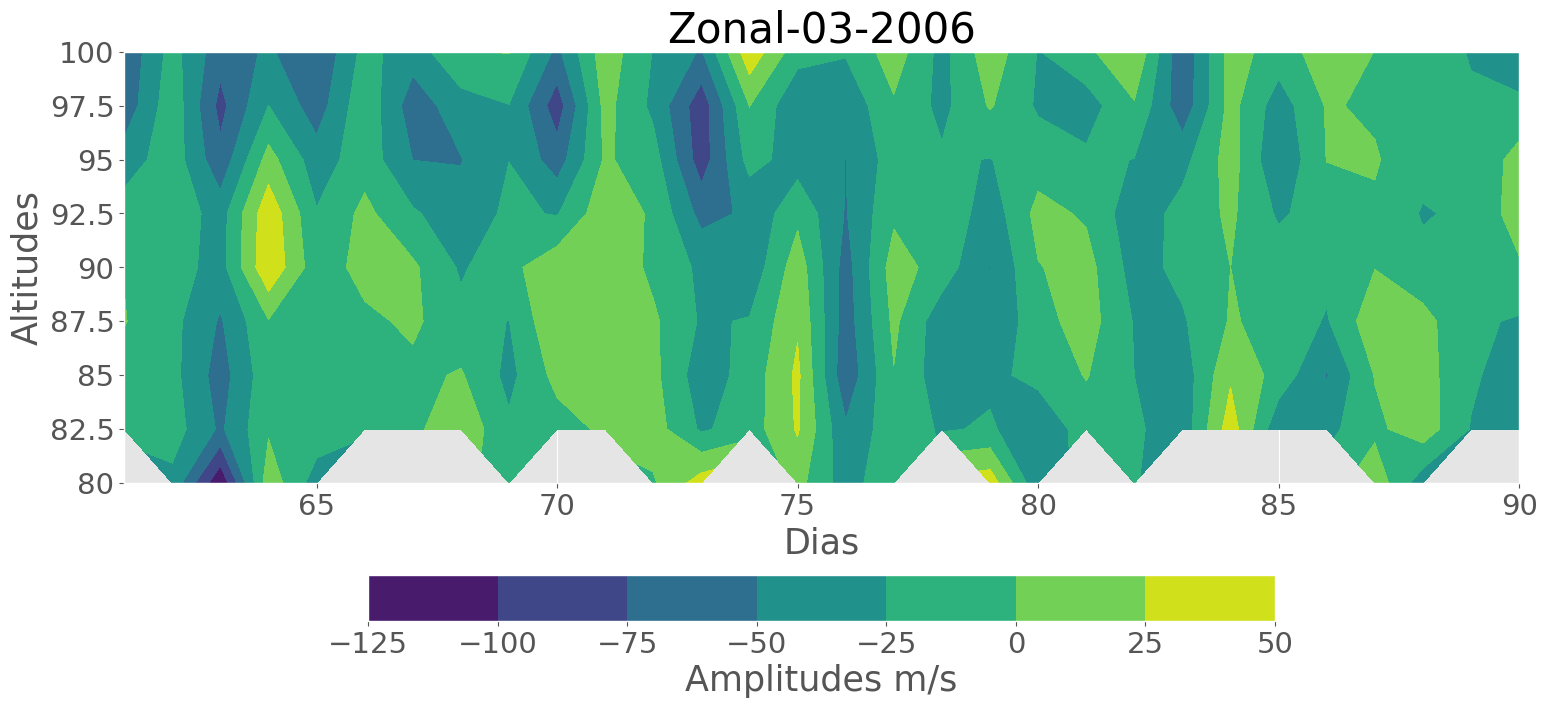

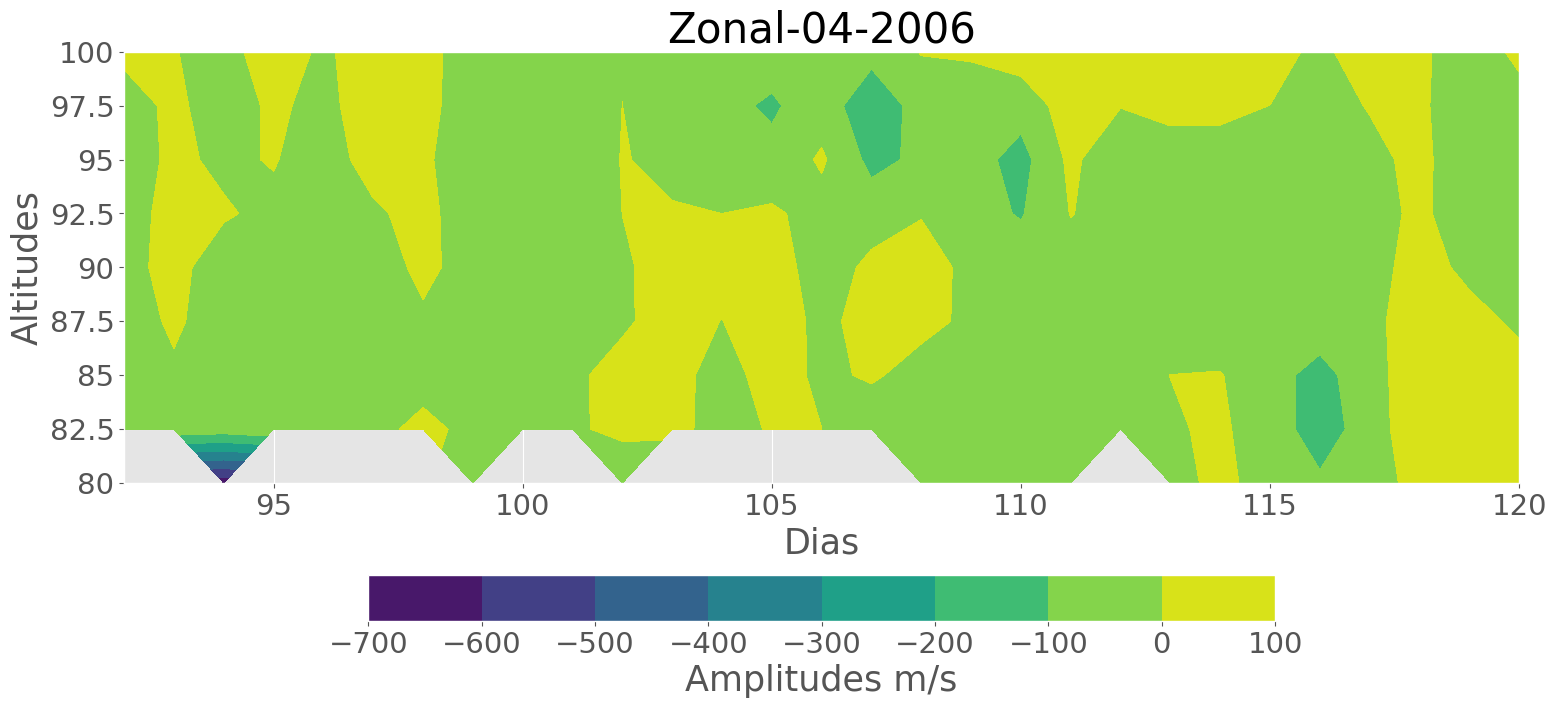

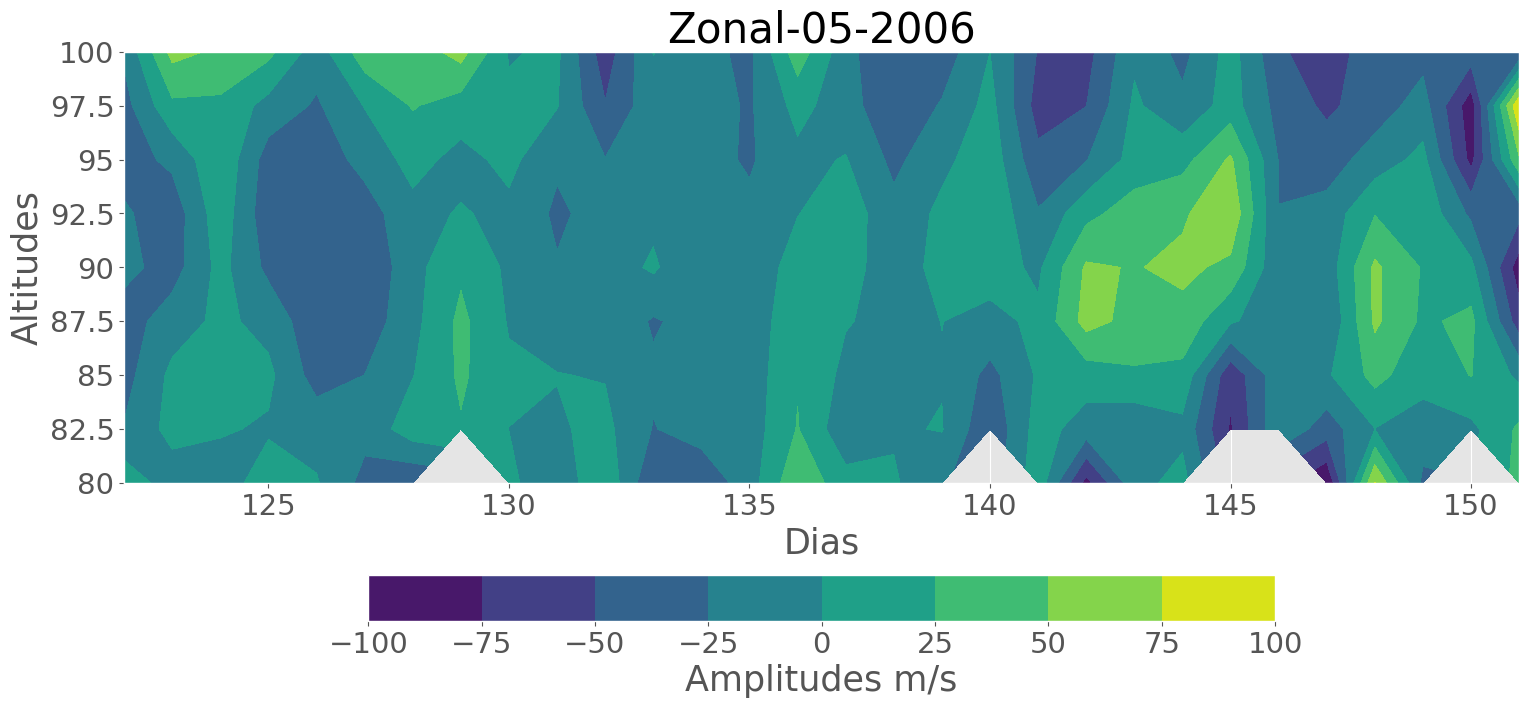

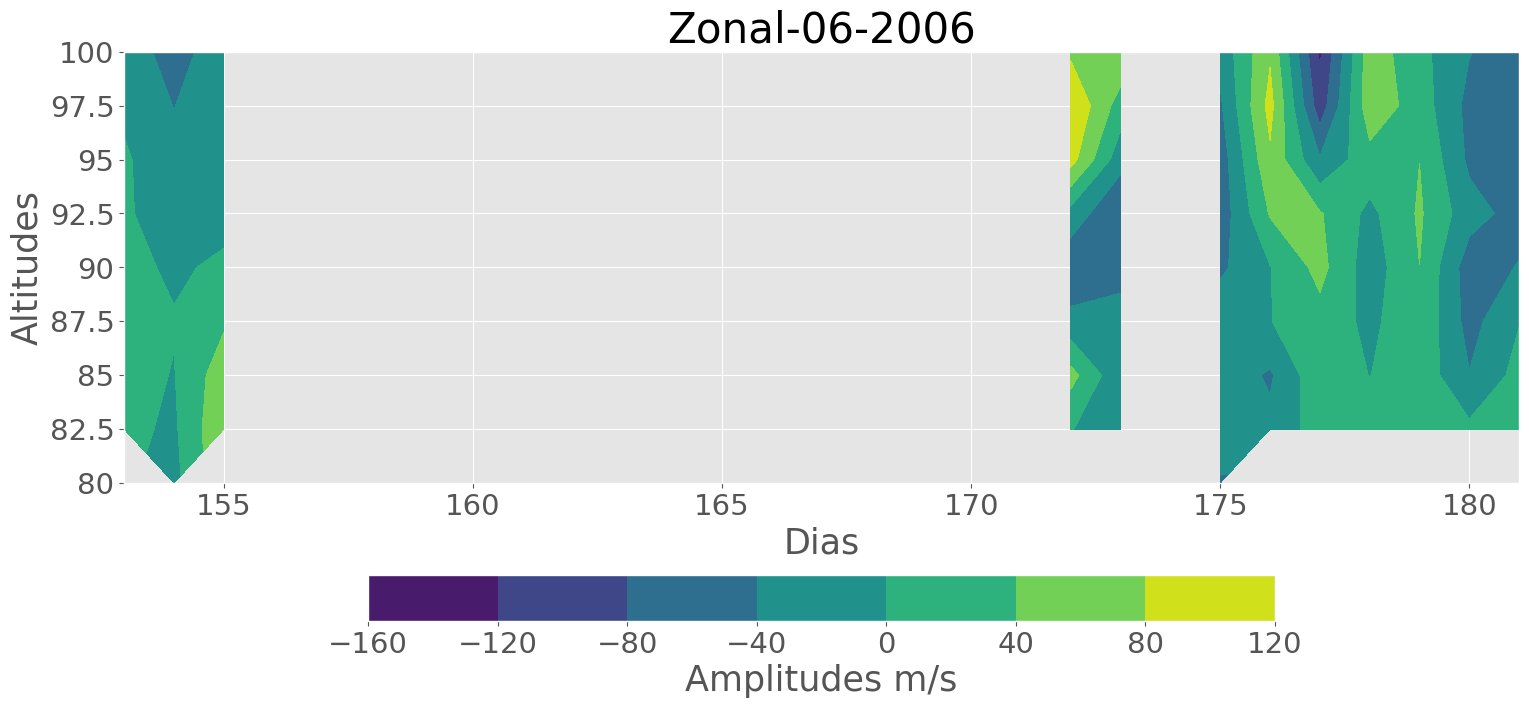

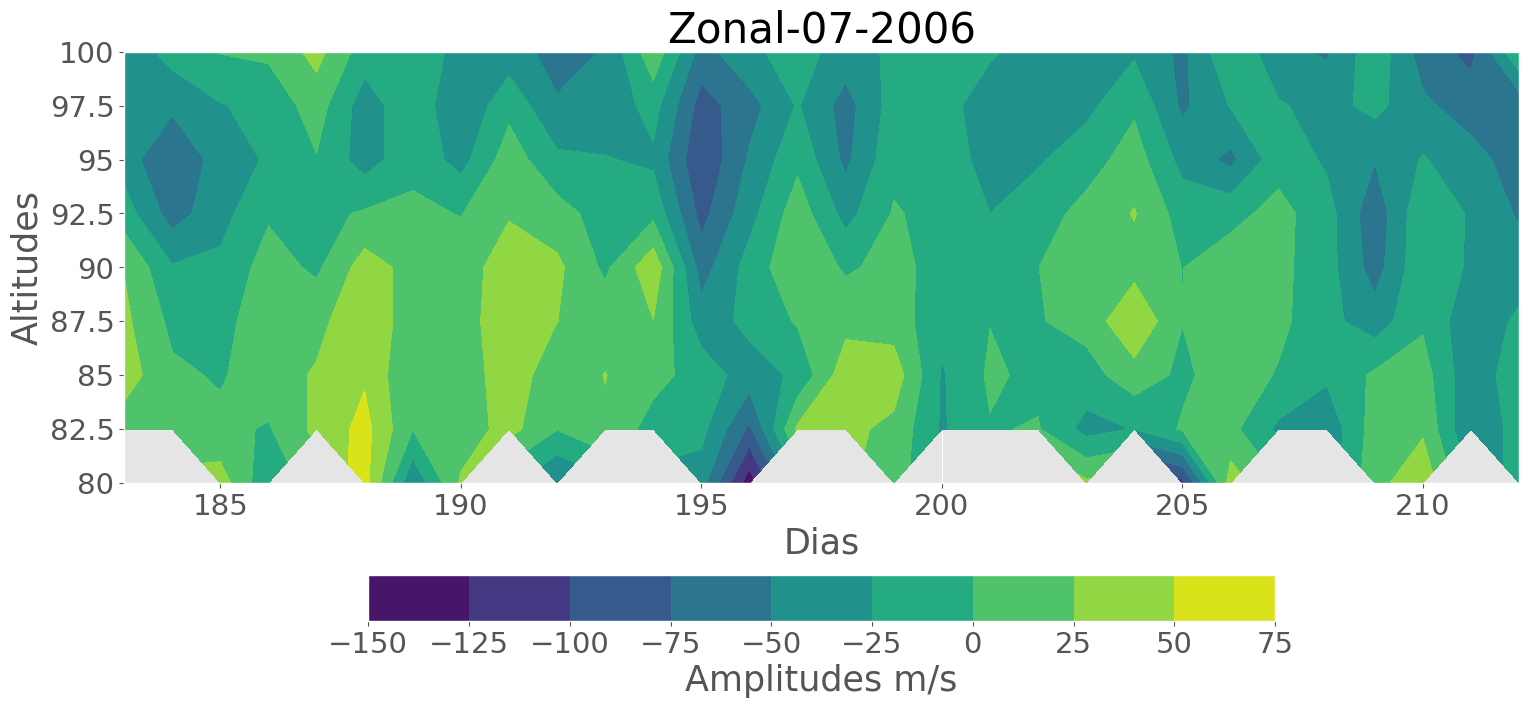

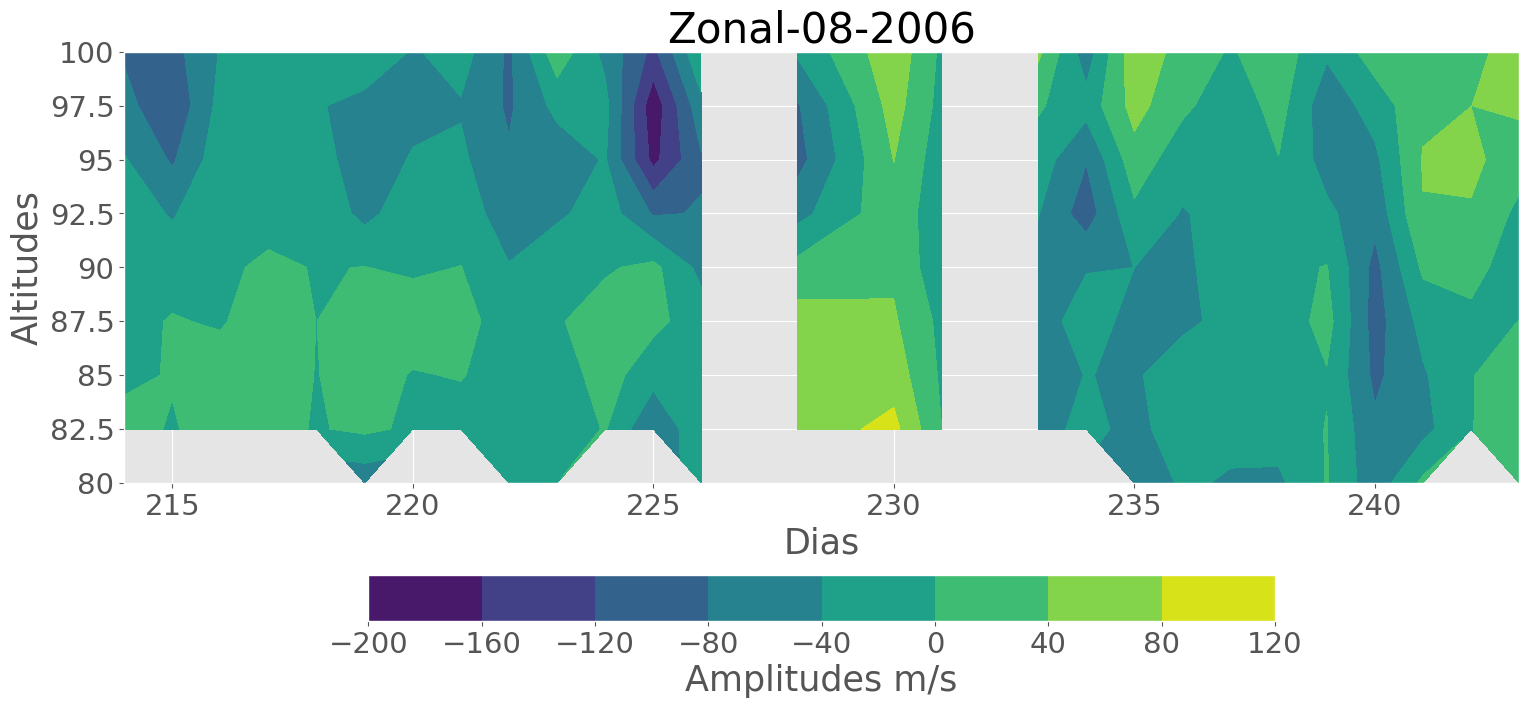

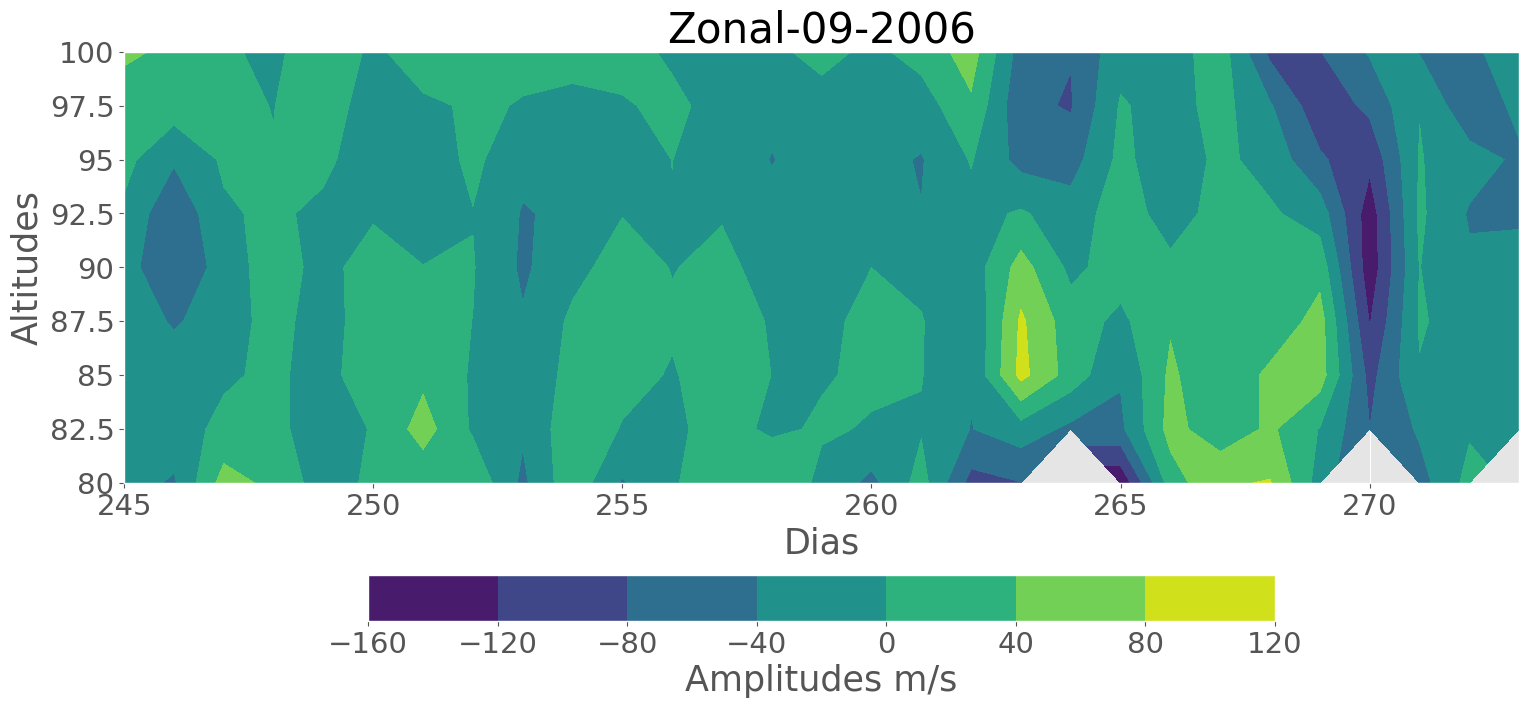

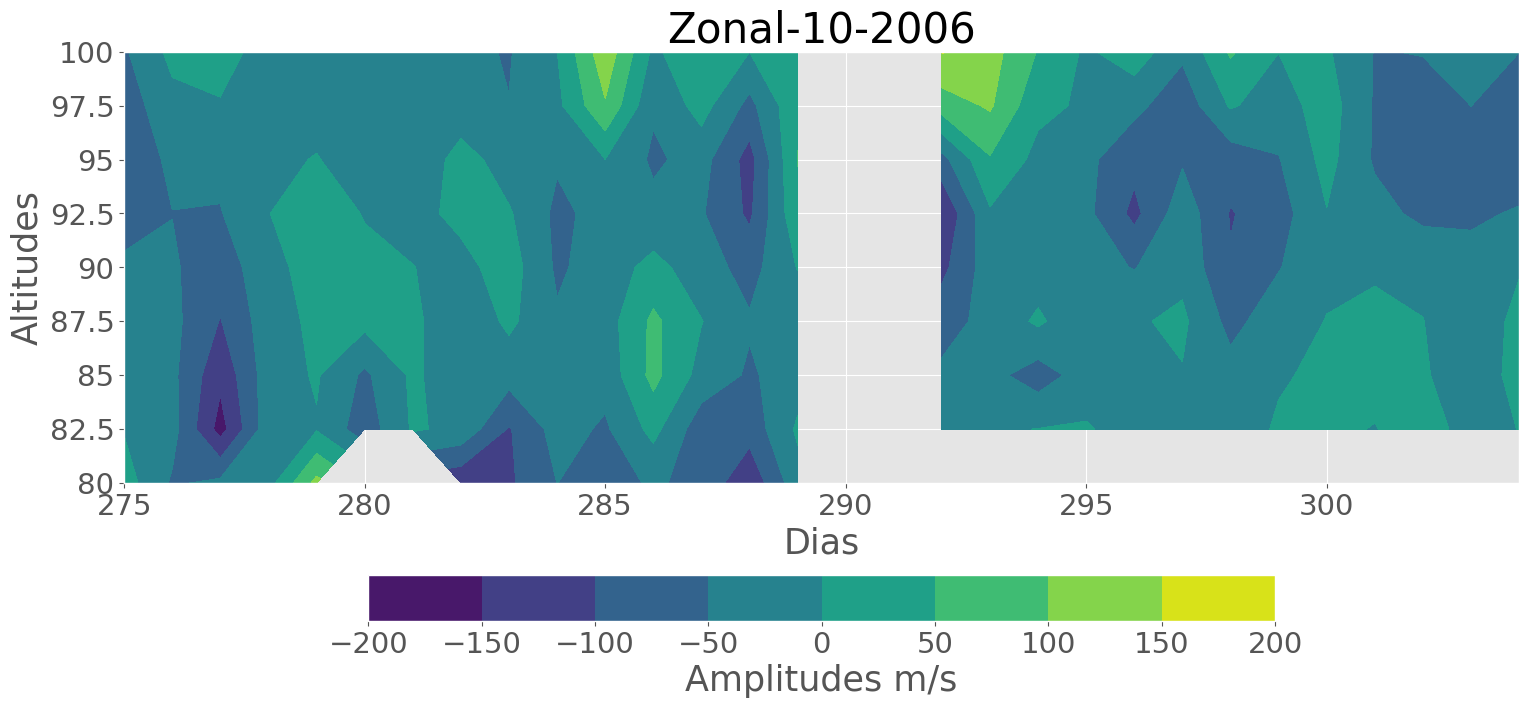

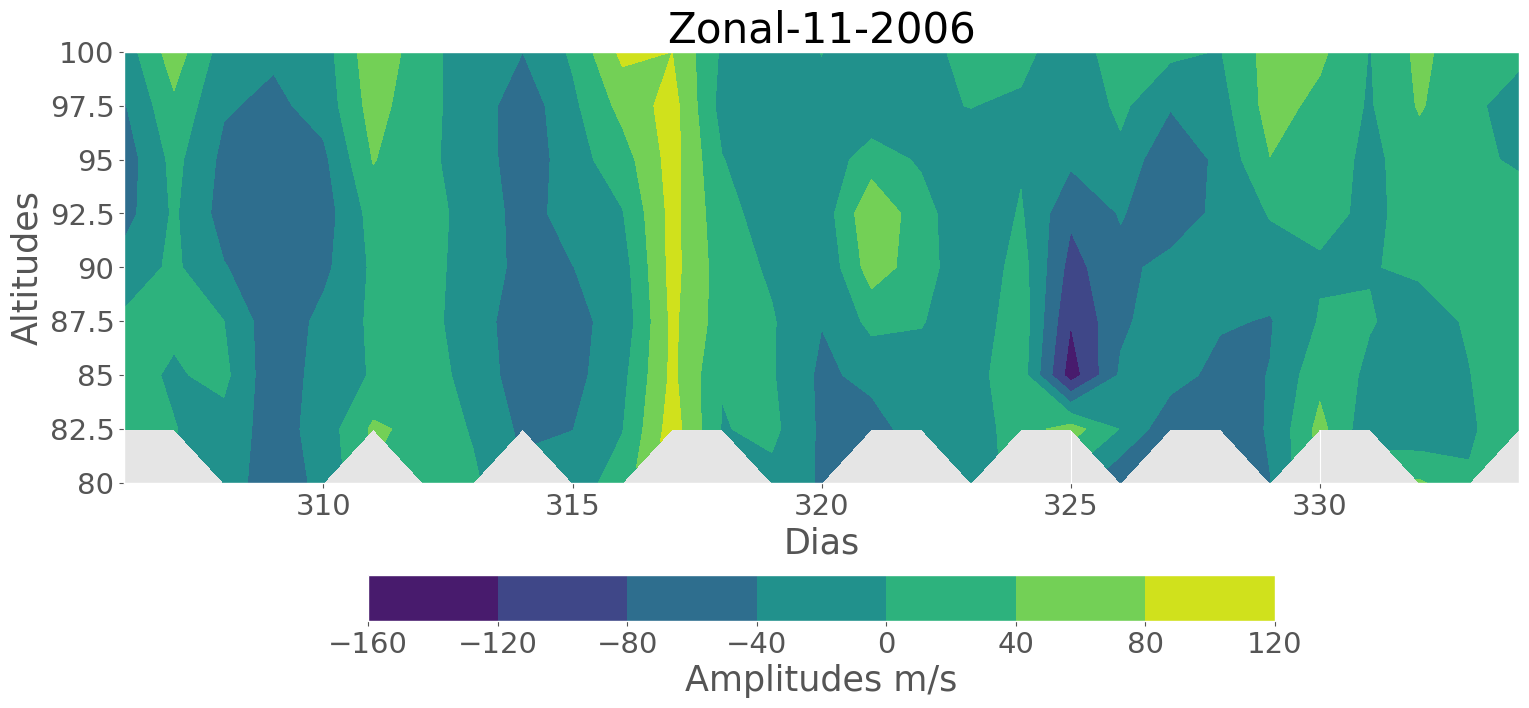

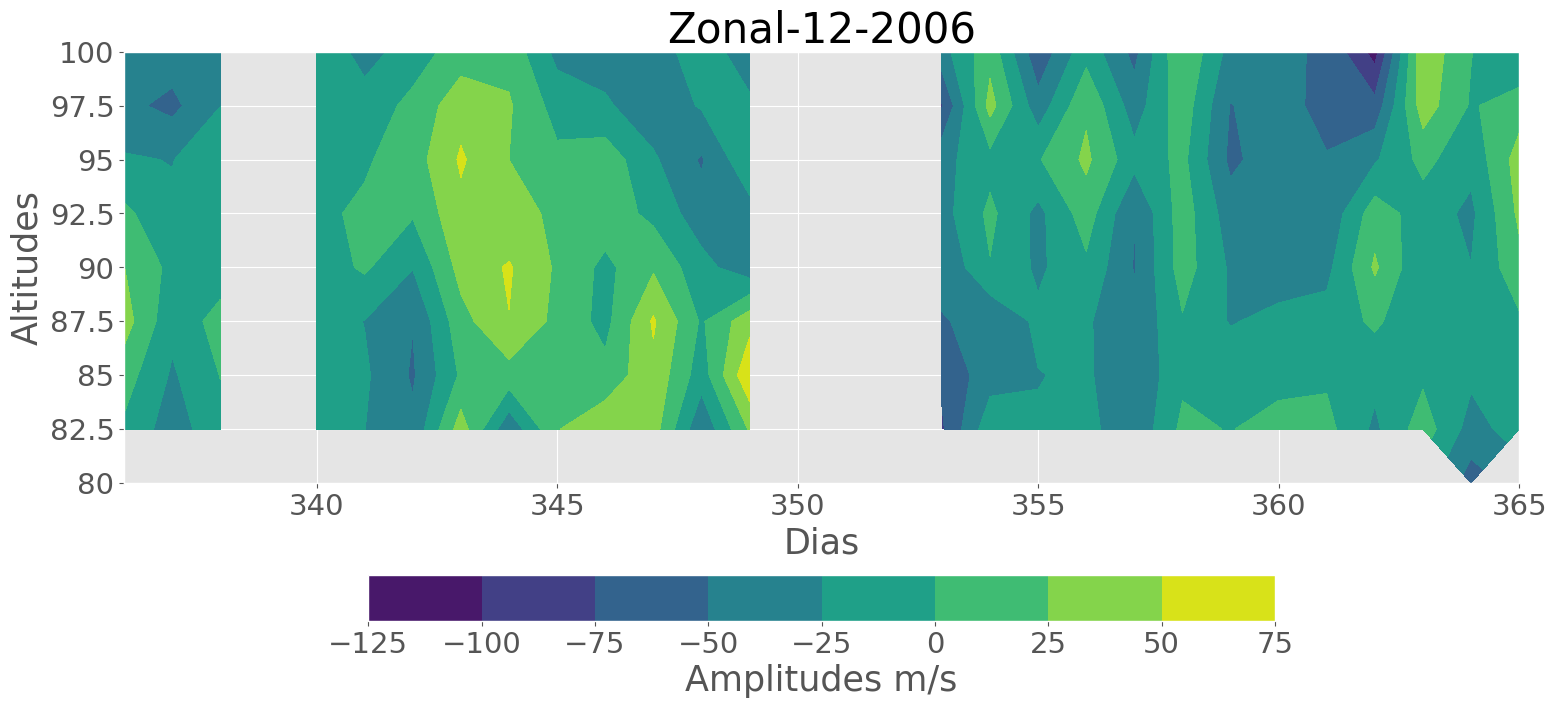

In [39]:
for i in arquivos3:
    df3 = pd.read_csv(i, sep='\s+')
    
    nome_arquivo = str(i)
    
    ano = nome_arquivo[-10:-6]
    mes = nome_arquivo[-6:-4]

    if 'zonal' in nome_arquivo:
        titulo = 'Zonal'
    else:
        titulo = 'Meridional'
    # tempo = range(0, len(df3))

    # nome = ''.join(compilado.findall(str(i)))
    # if nome[-17:-12] == 'Zonal':
    #     titulo = 'Zonal'
    # else:
    #     titulo = 'Meridional'
    # anos = ''.join(ano.findall(str(i)))
    # mes = nome[-6:-3]

    x = df3['dia'].T
    y = cabe[1:]
    z = df3[cabe[1:]].T
    fig = plt.figure(figsize=(18, 8))
    cs = plt.contourf(x, y, z, cmap='viridis')
    plt.title(f'{titulo}-{mes}-{ano}')
    plt.ylabel('Altitudes')
    plt.xlabel('Dias')
    corbar = plt.colorbar(orientation = 'horizontal', shrink=0.65)
    corbar.set_label('Amplitudes m/s')
    plt.savefig(f'dados/tidi/figuras/{titulo}_{ano}_{mes}.png')
    plt.show()